In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data.csv')


In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
len(data.columns)

81

# categorical and numerical columns segregation
step1- using dtype condition trying to find the categorical and numeical columns by passing it into forloop

step2 listed the number of unqiue values present in the categorical columns and their counts using value_counts function

In [6]:
cat_cols=[]  # empty list for categorical columns
numerical_cols=[]     #empty list for numerical columns

for i in data.columns:
    if data[i].dtype=='object':
        cat_cols.append(i)
    else:
        numerical_cols.append(i)
print('catgorical columns are:  \n',cat_cols,end=' ')
print('\n')
print('numerical columns are: \n', numerical_cols, end=' ')

catgorical columns are:  
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

numerical columns are: 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'Gar

In [7]:
for i in cat_cols:
    print(f'the value counts of {i} are \n{data[i].value_counts()}')
    print("**********************************")

the value counts of MSZoning are 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**********************************
the value counts of Street are 
Pave    1454
Grvl       6
Name: Street, dtype: int64
**********************************
the value counts of Alley are 
Grvl    50
Pave    41
Name: Alley, dtype: int64
**********************************
the value counts of LotShape are 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**********************************
the value counts of LandContour are 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**********************************
the value counts of Utilities are 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**********************************
the value counts of LotConfig are 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
*******************

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
numerical_data=data[numerical_cols]
cat_data=data[cat_cols]

In [11]:
numerical_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Visualization of categorical columns

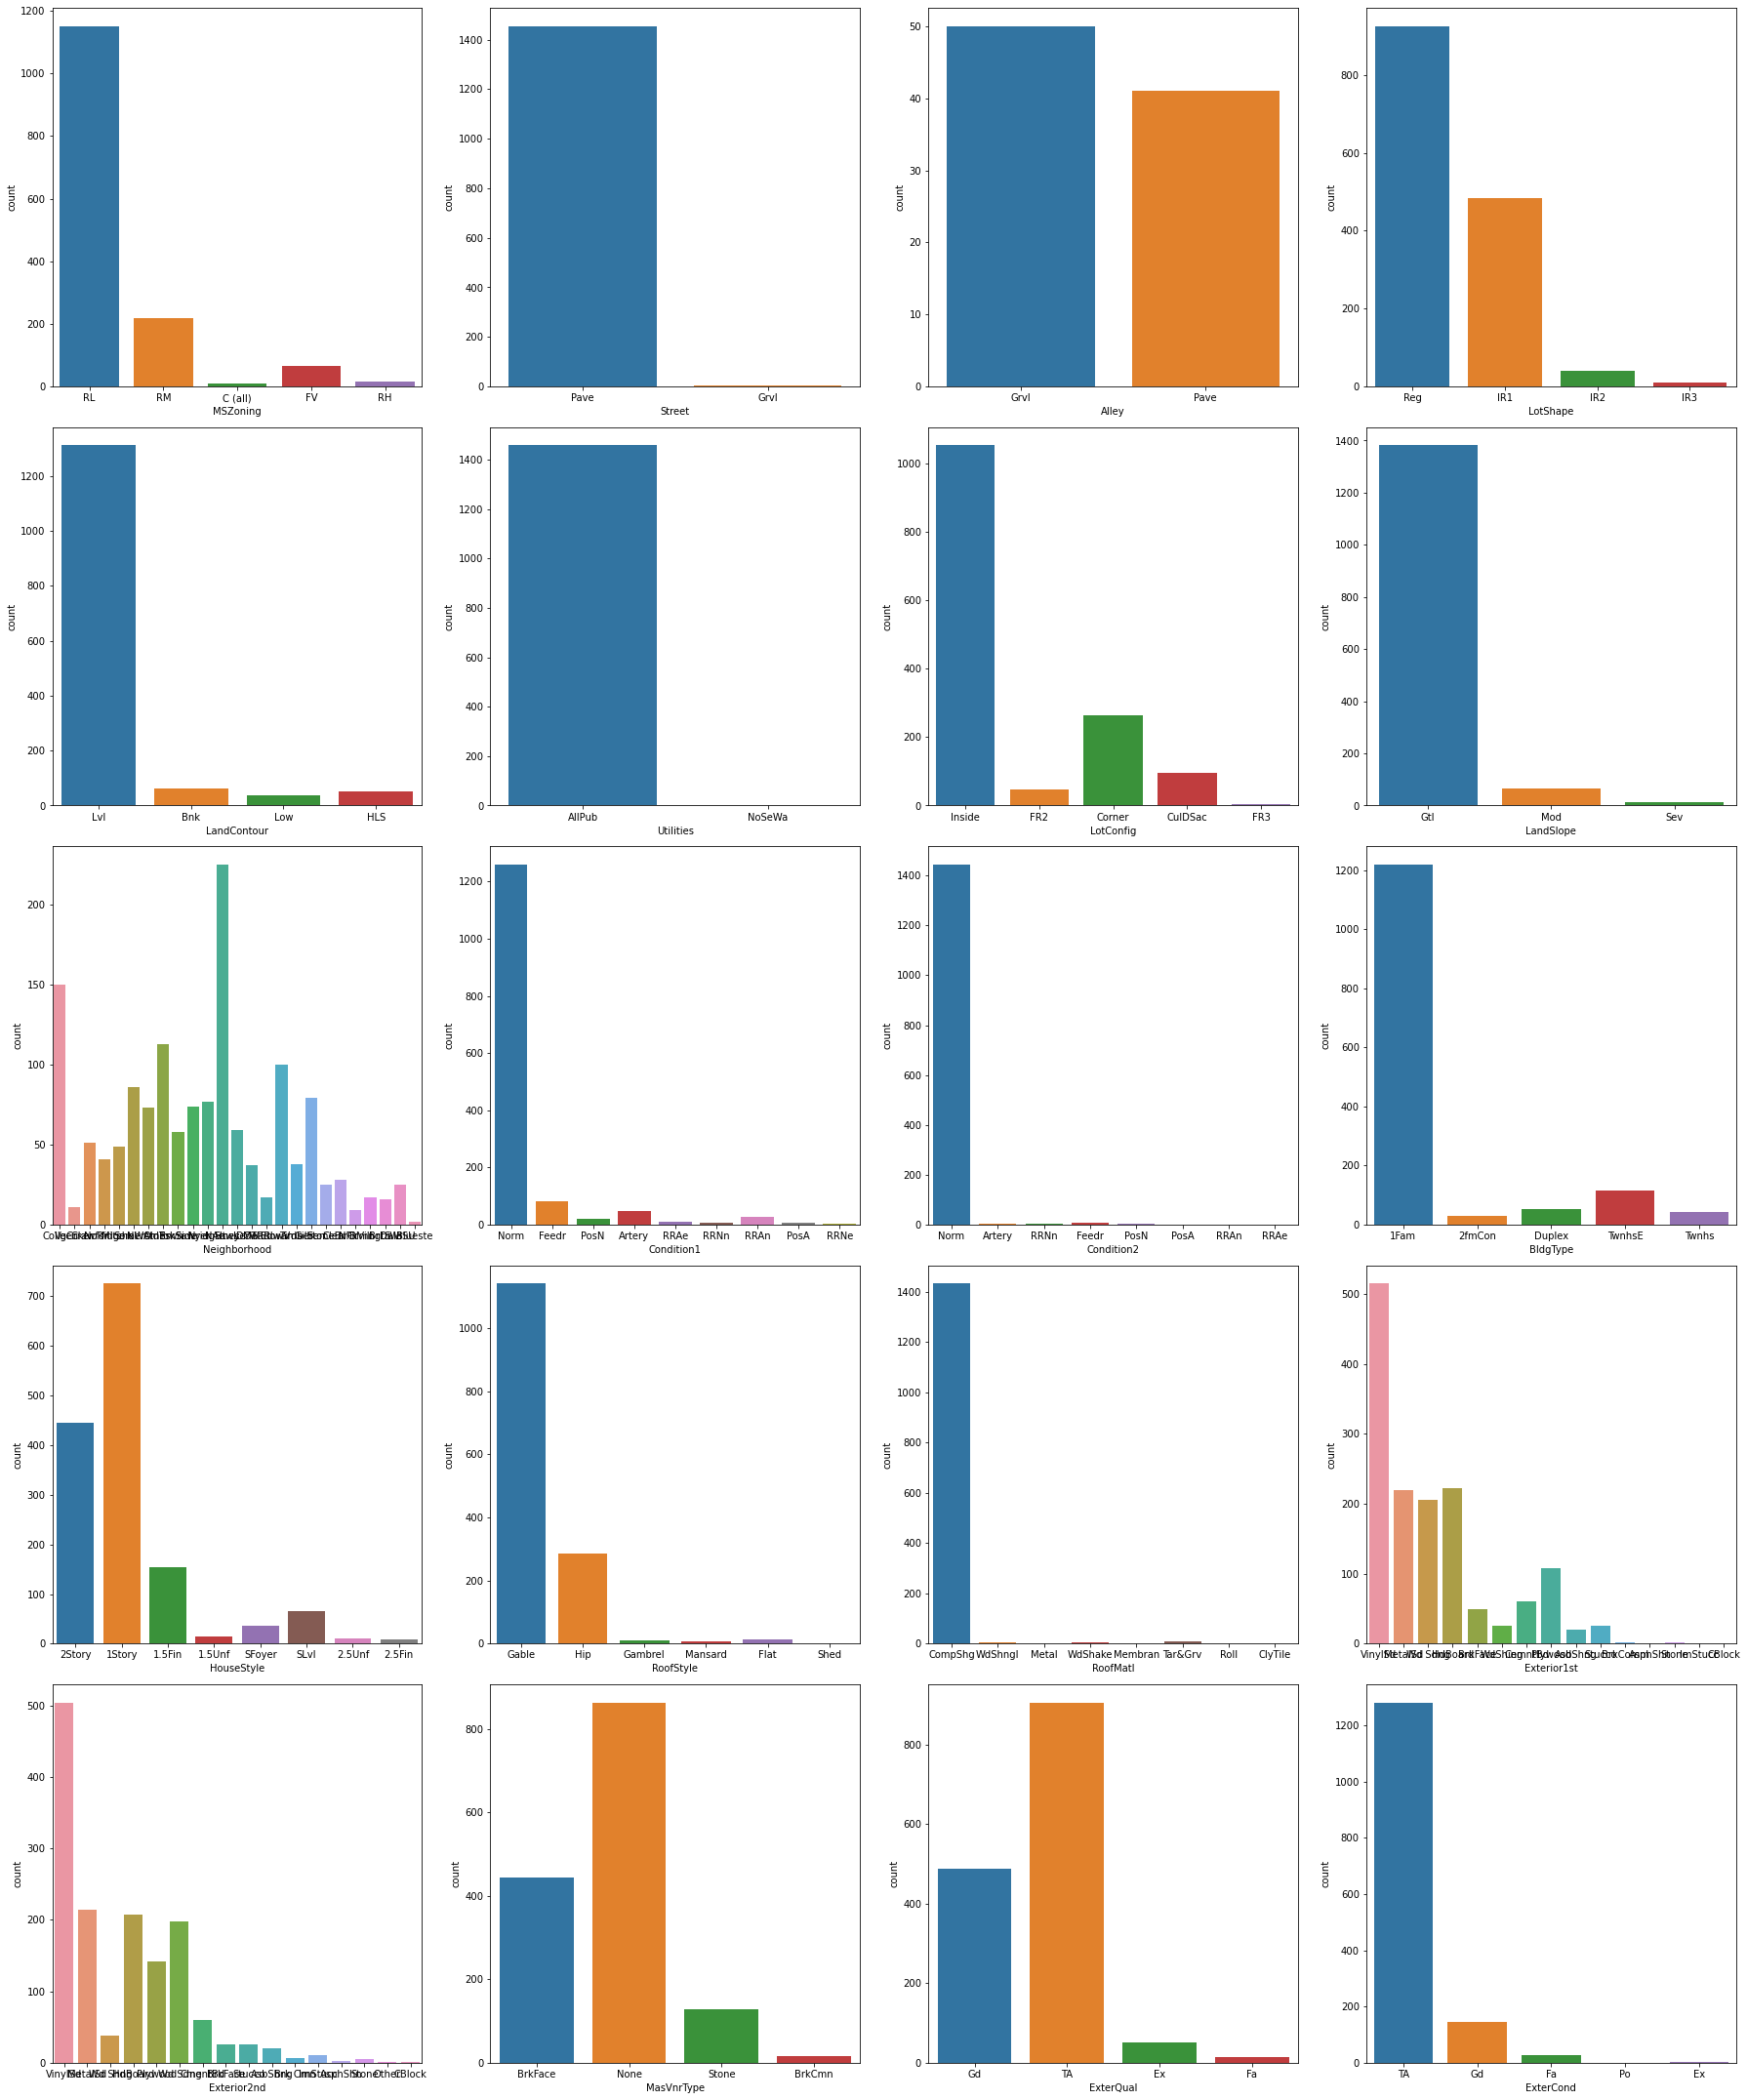

In [13]:
plt.figure(figsize=(25,30))
pl_no=1

for i in cat_data.columns[:20]:
    plt.subplot(5,4,pl_no)
    sns.countplot(x=i,data=data)
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()


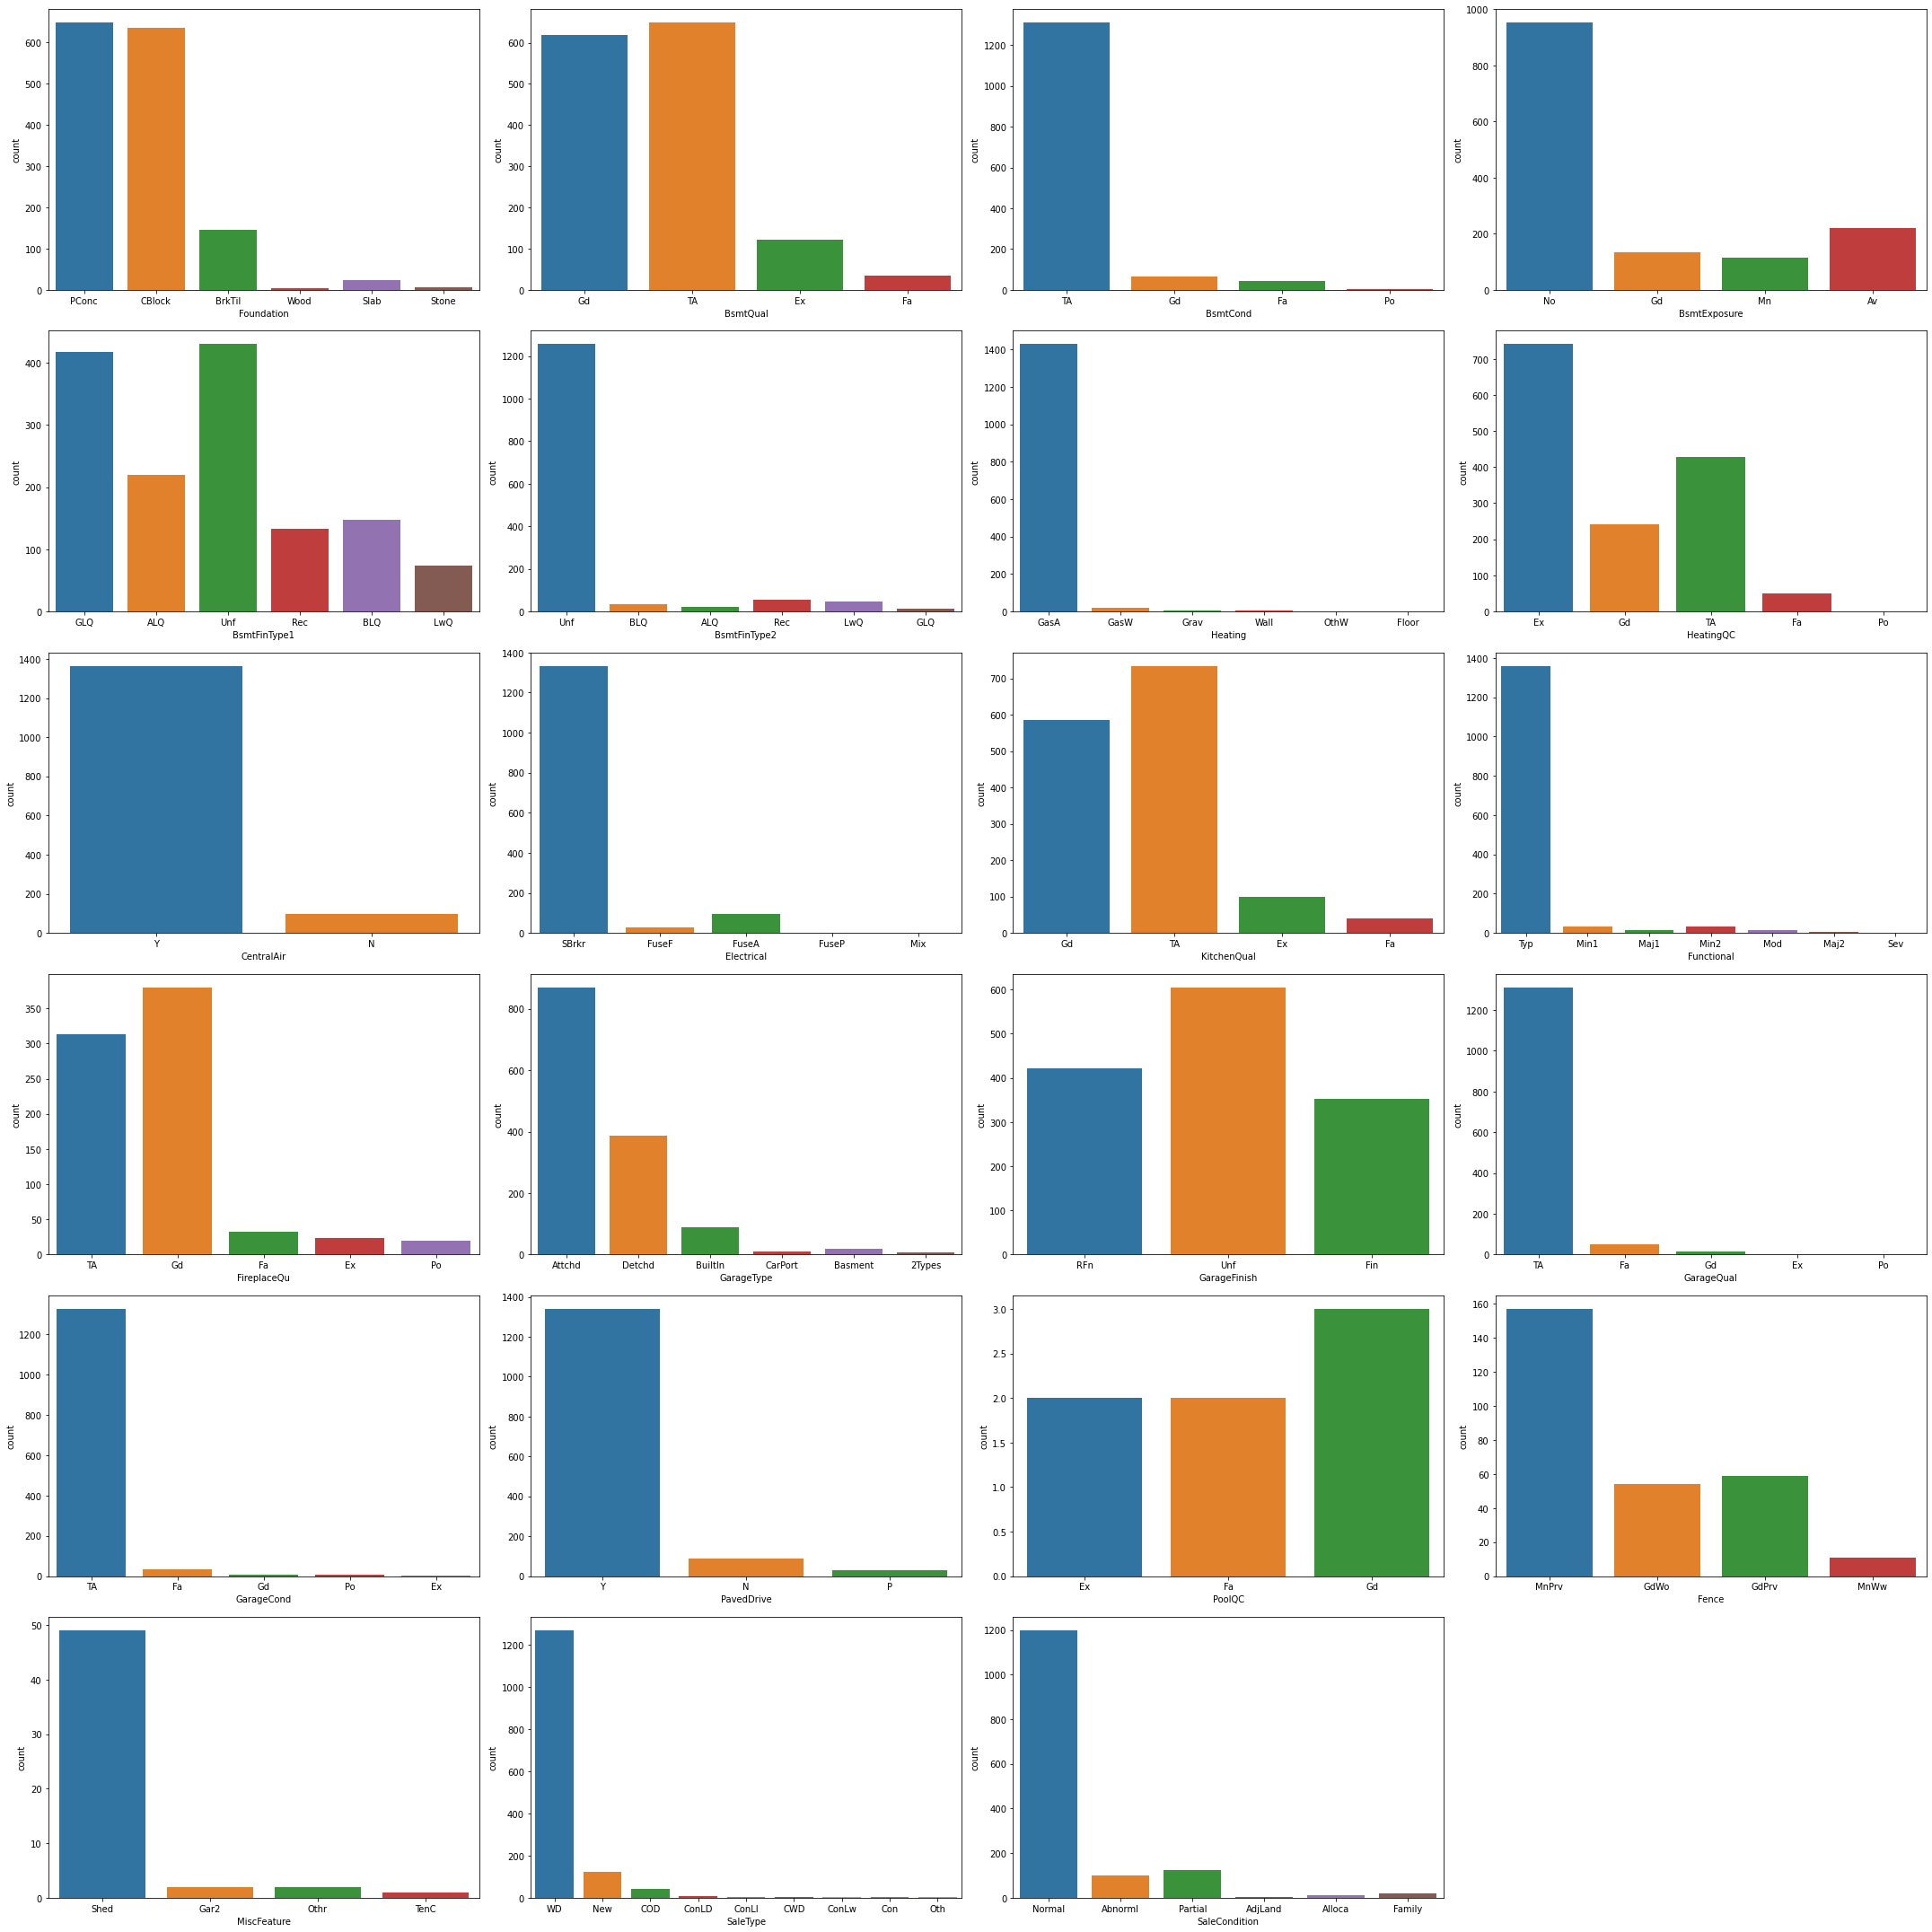

In [14]:
plt.figure(figsize=(30,30))
pl_no=1
for i in cat_data.columns[20:]:
    plt.subplot(6,4,pl_no)
    sns.countplot(x=i,data=data)
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()

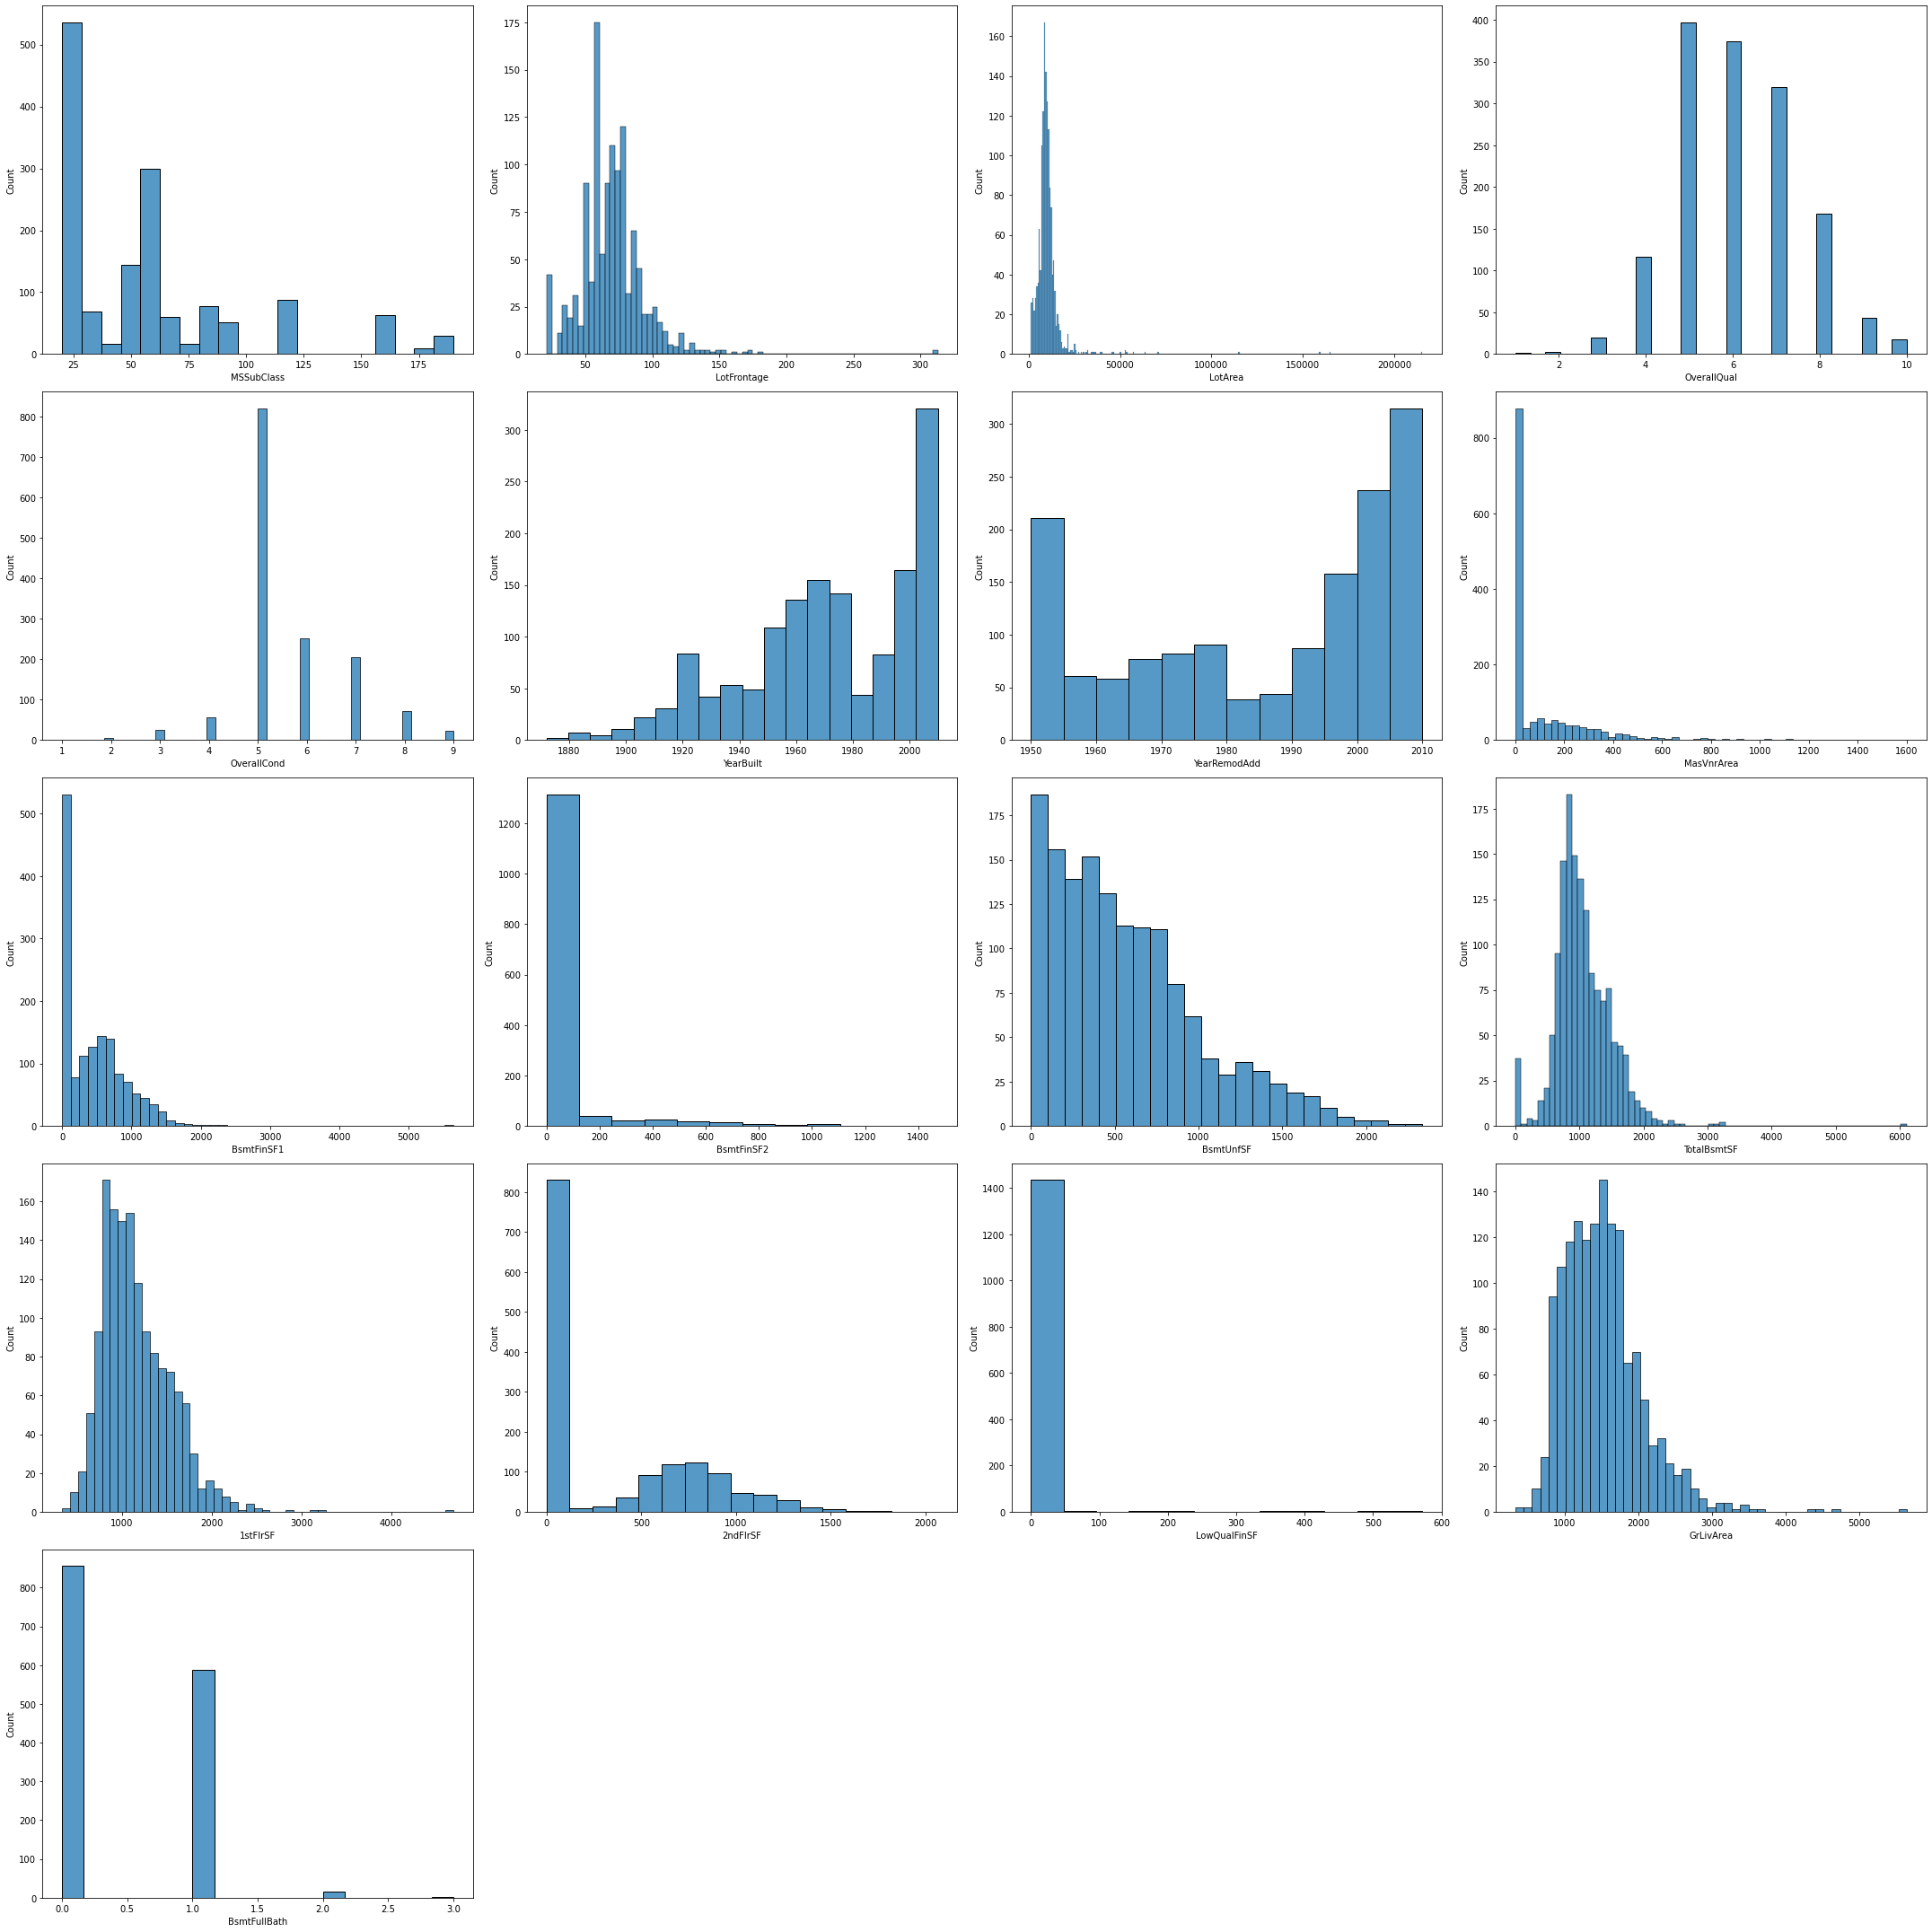

In [15]:
plt.figure(figsize=(30,30))
pl_no=1
for i in numerical_data.columns[1:18]:
    plt.subplot(5,4,pl_no)
    sns.histplot(x=i,data=data)
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()

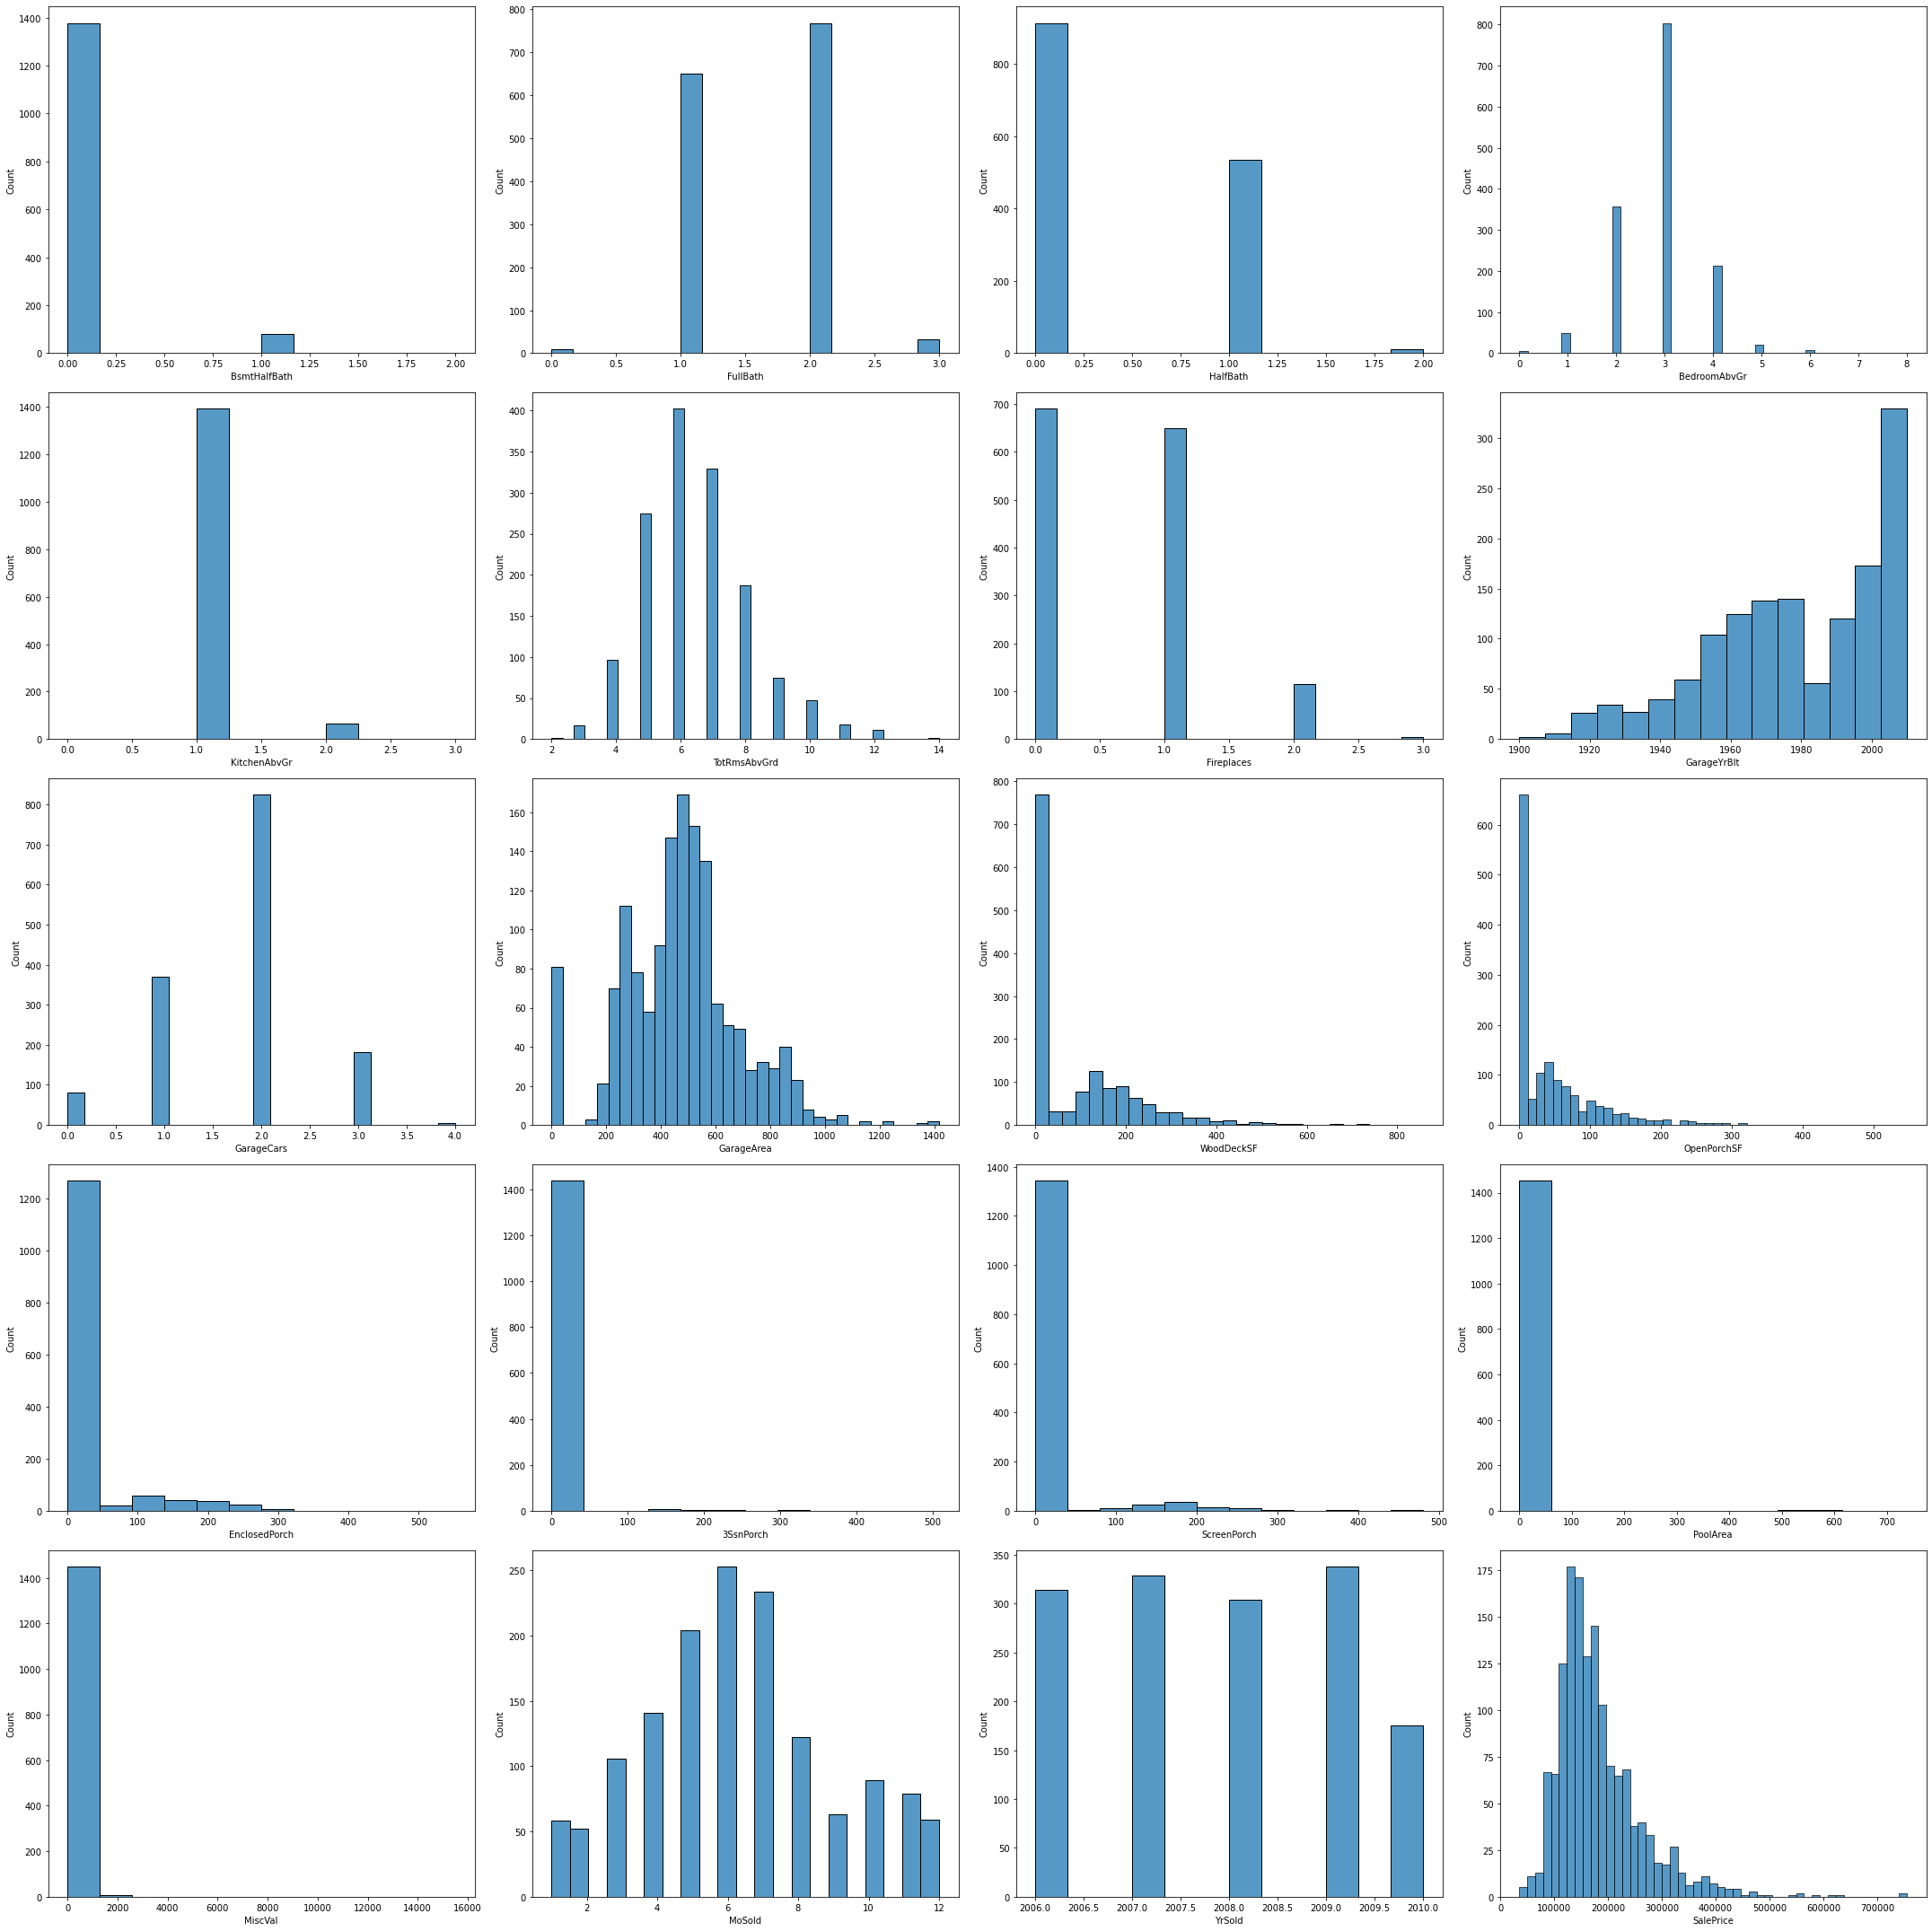

In [16]:
plt.figure(figsize=(30,30))
pl_no=1
for i in numerical_data.columns[18:]:
    plt.subplot(5,4,pl_no)
    sns.histplot(x=i,data=data)
    pl_no+=1
    plt.xlabel=i
plt.tight_layout()

In [17]:
#year data
year_cols=[feature for feature in numerical_cols if 'Yr' in feature or 'Year' in feature]
print(year_cols)
year_data=data[year_cols]
year_data.head()

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


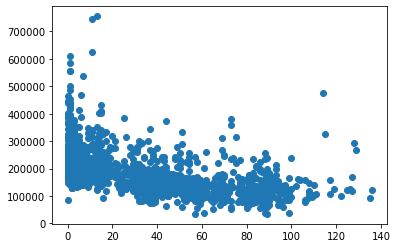

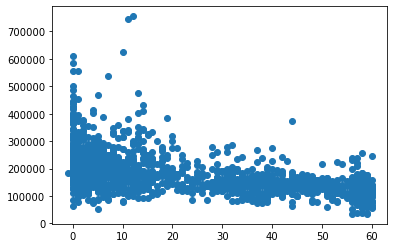

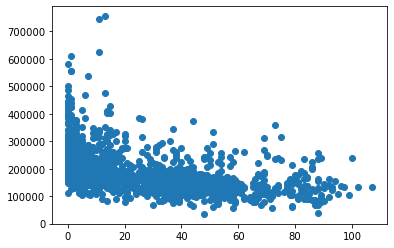

<Figure size 432x288 with 0 Axes>

In [18]:
for feature in year_cols:
    if feature!='YrSold':
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel=feature
        plt.ylabel='SalePrice'
        plt.show()
plt.tight_layout()
        

In [19]:
descreate_cols=[]
for i in numerical_cols:
    if len(data[i].unique())<25 and i not in year_cols:
        descreate_cols.append(i)

In [20]:

descreate_data=data[descreate_cols]
descreate_data.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


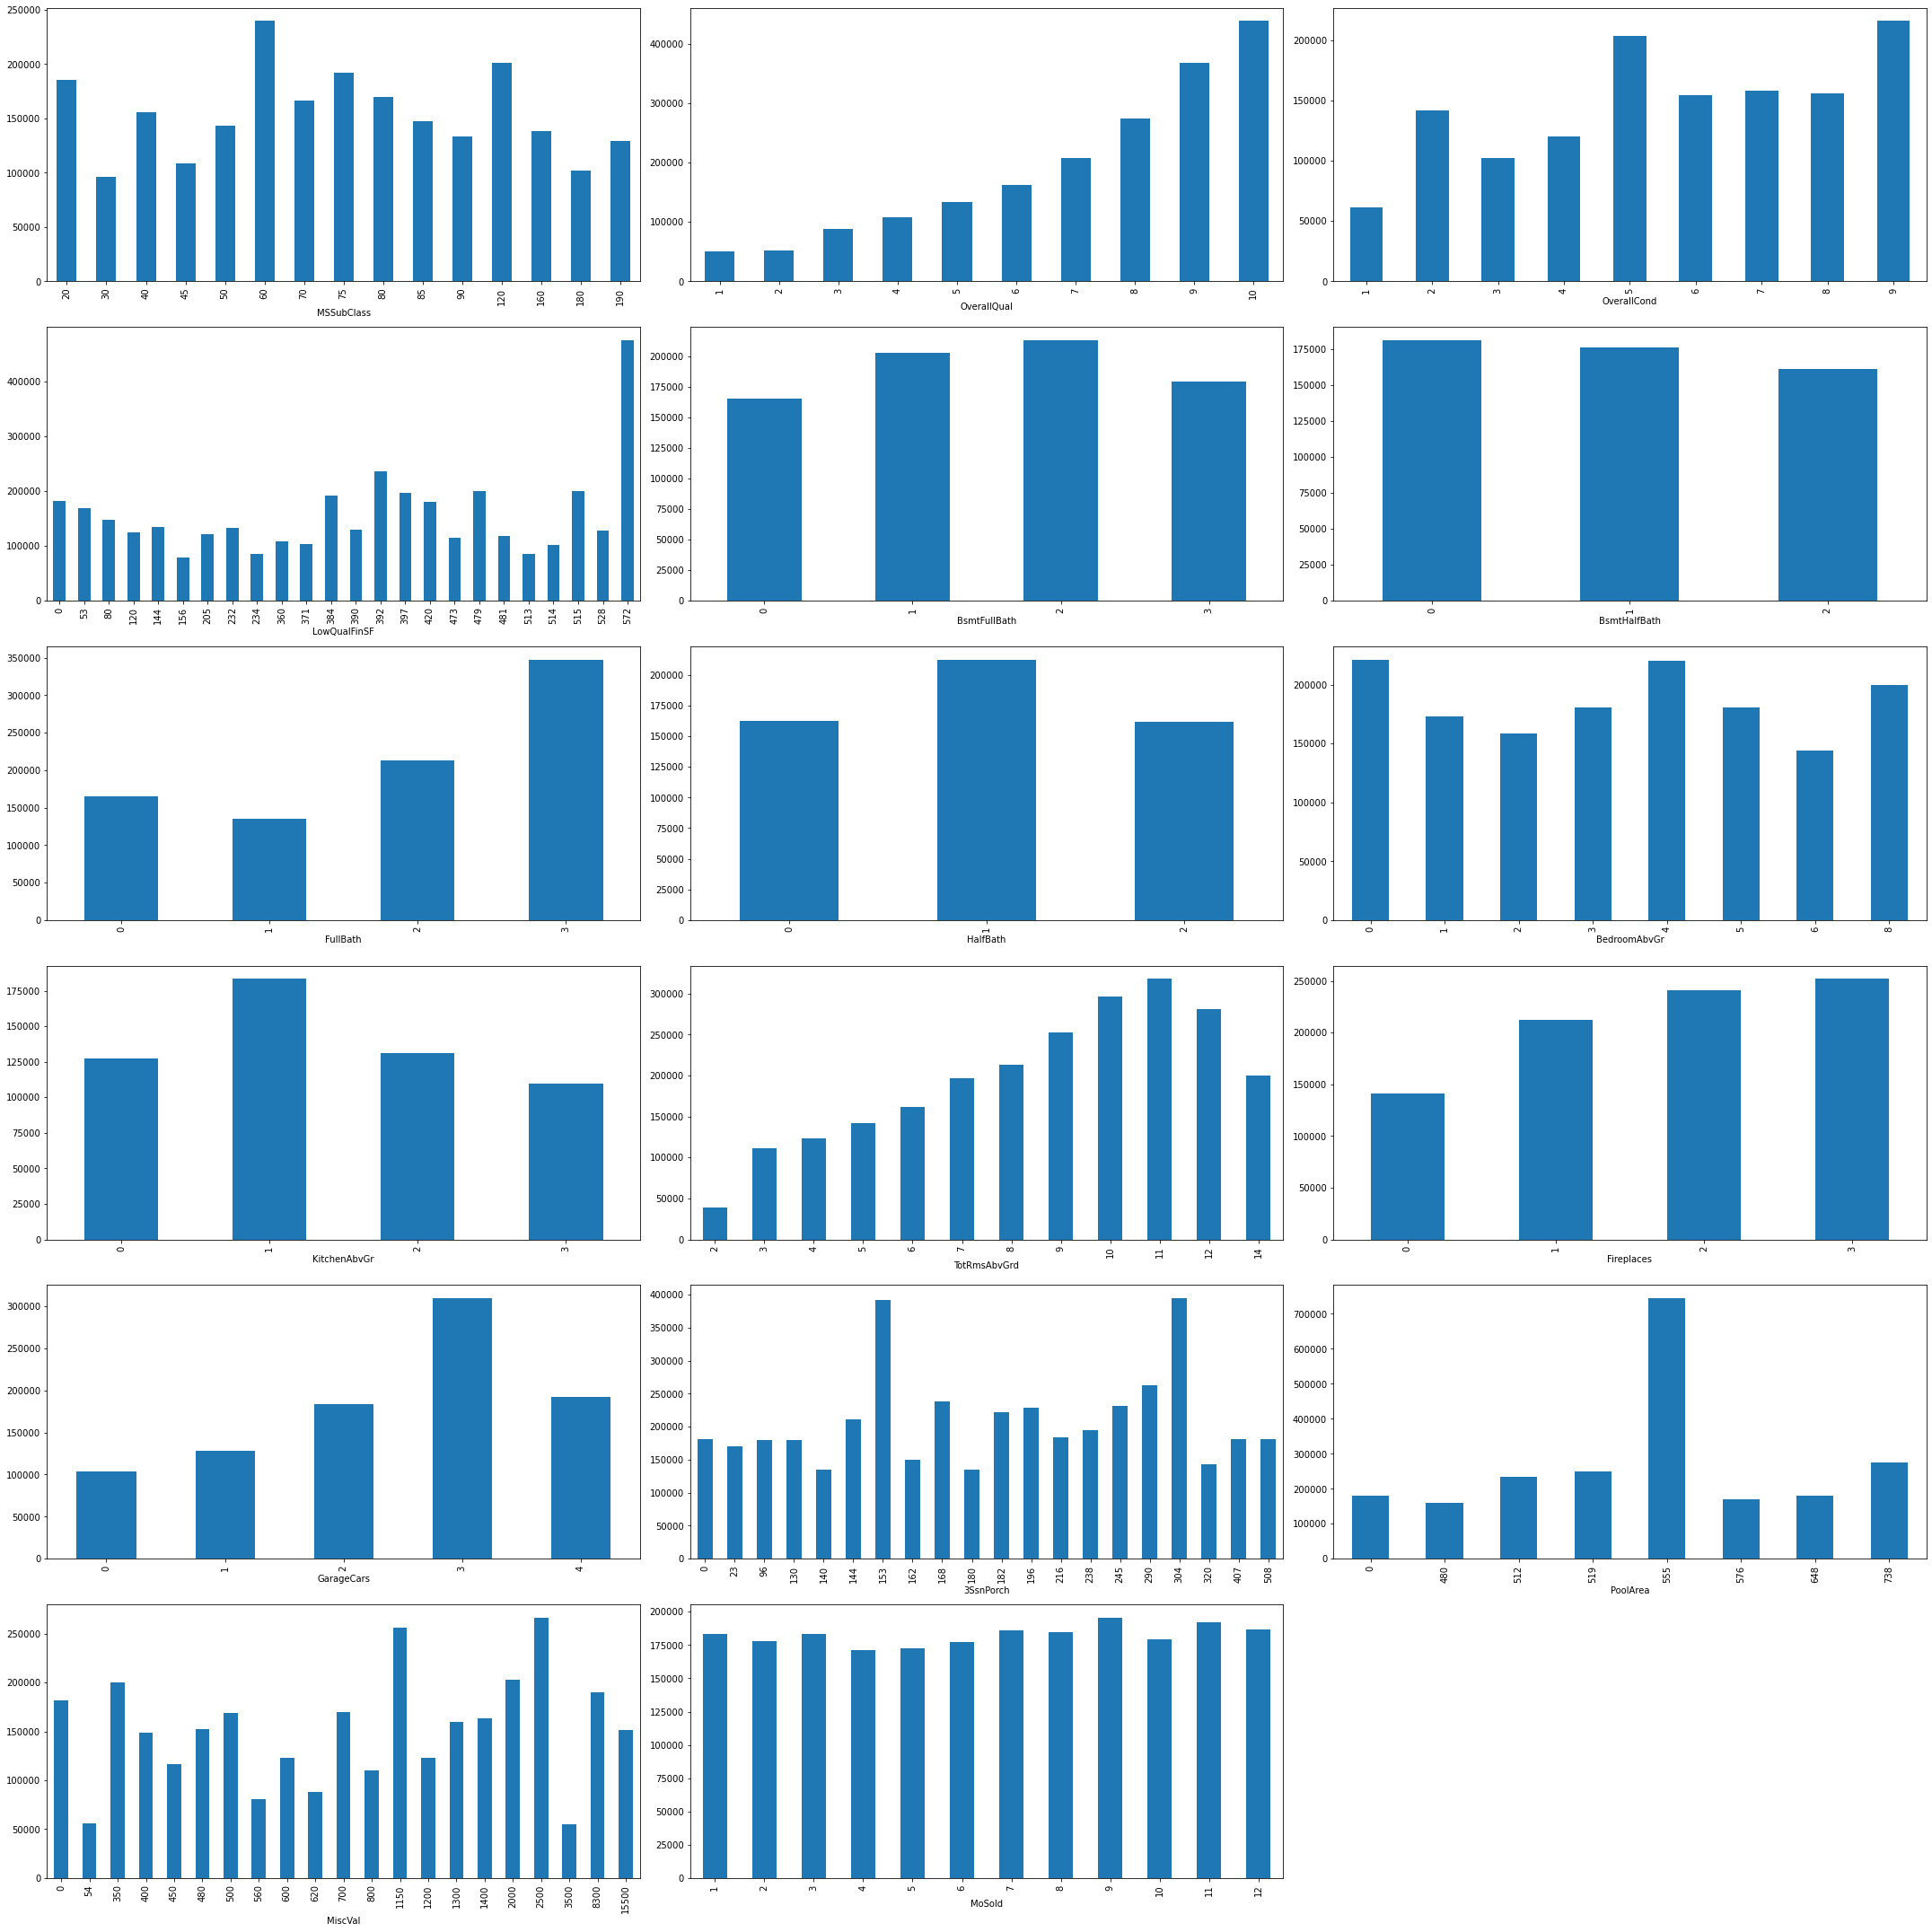

In [21]:
plt.figure(figsize=(30,30))
pl_no=1
for i in descreate_data.columns:
    plt.subplot(6,3,pl_no)
    data.groupby(i)['SalePrice'].mean().plot(kind='bar')
    plt.xlabel=i
    plt.ylabel='SalePrice'
    pl_no+=1
plt.tight_layout()

In [22]:
len(cat_cols)

43

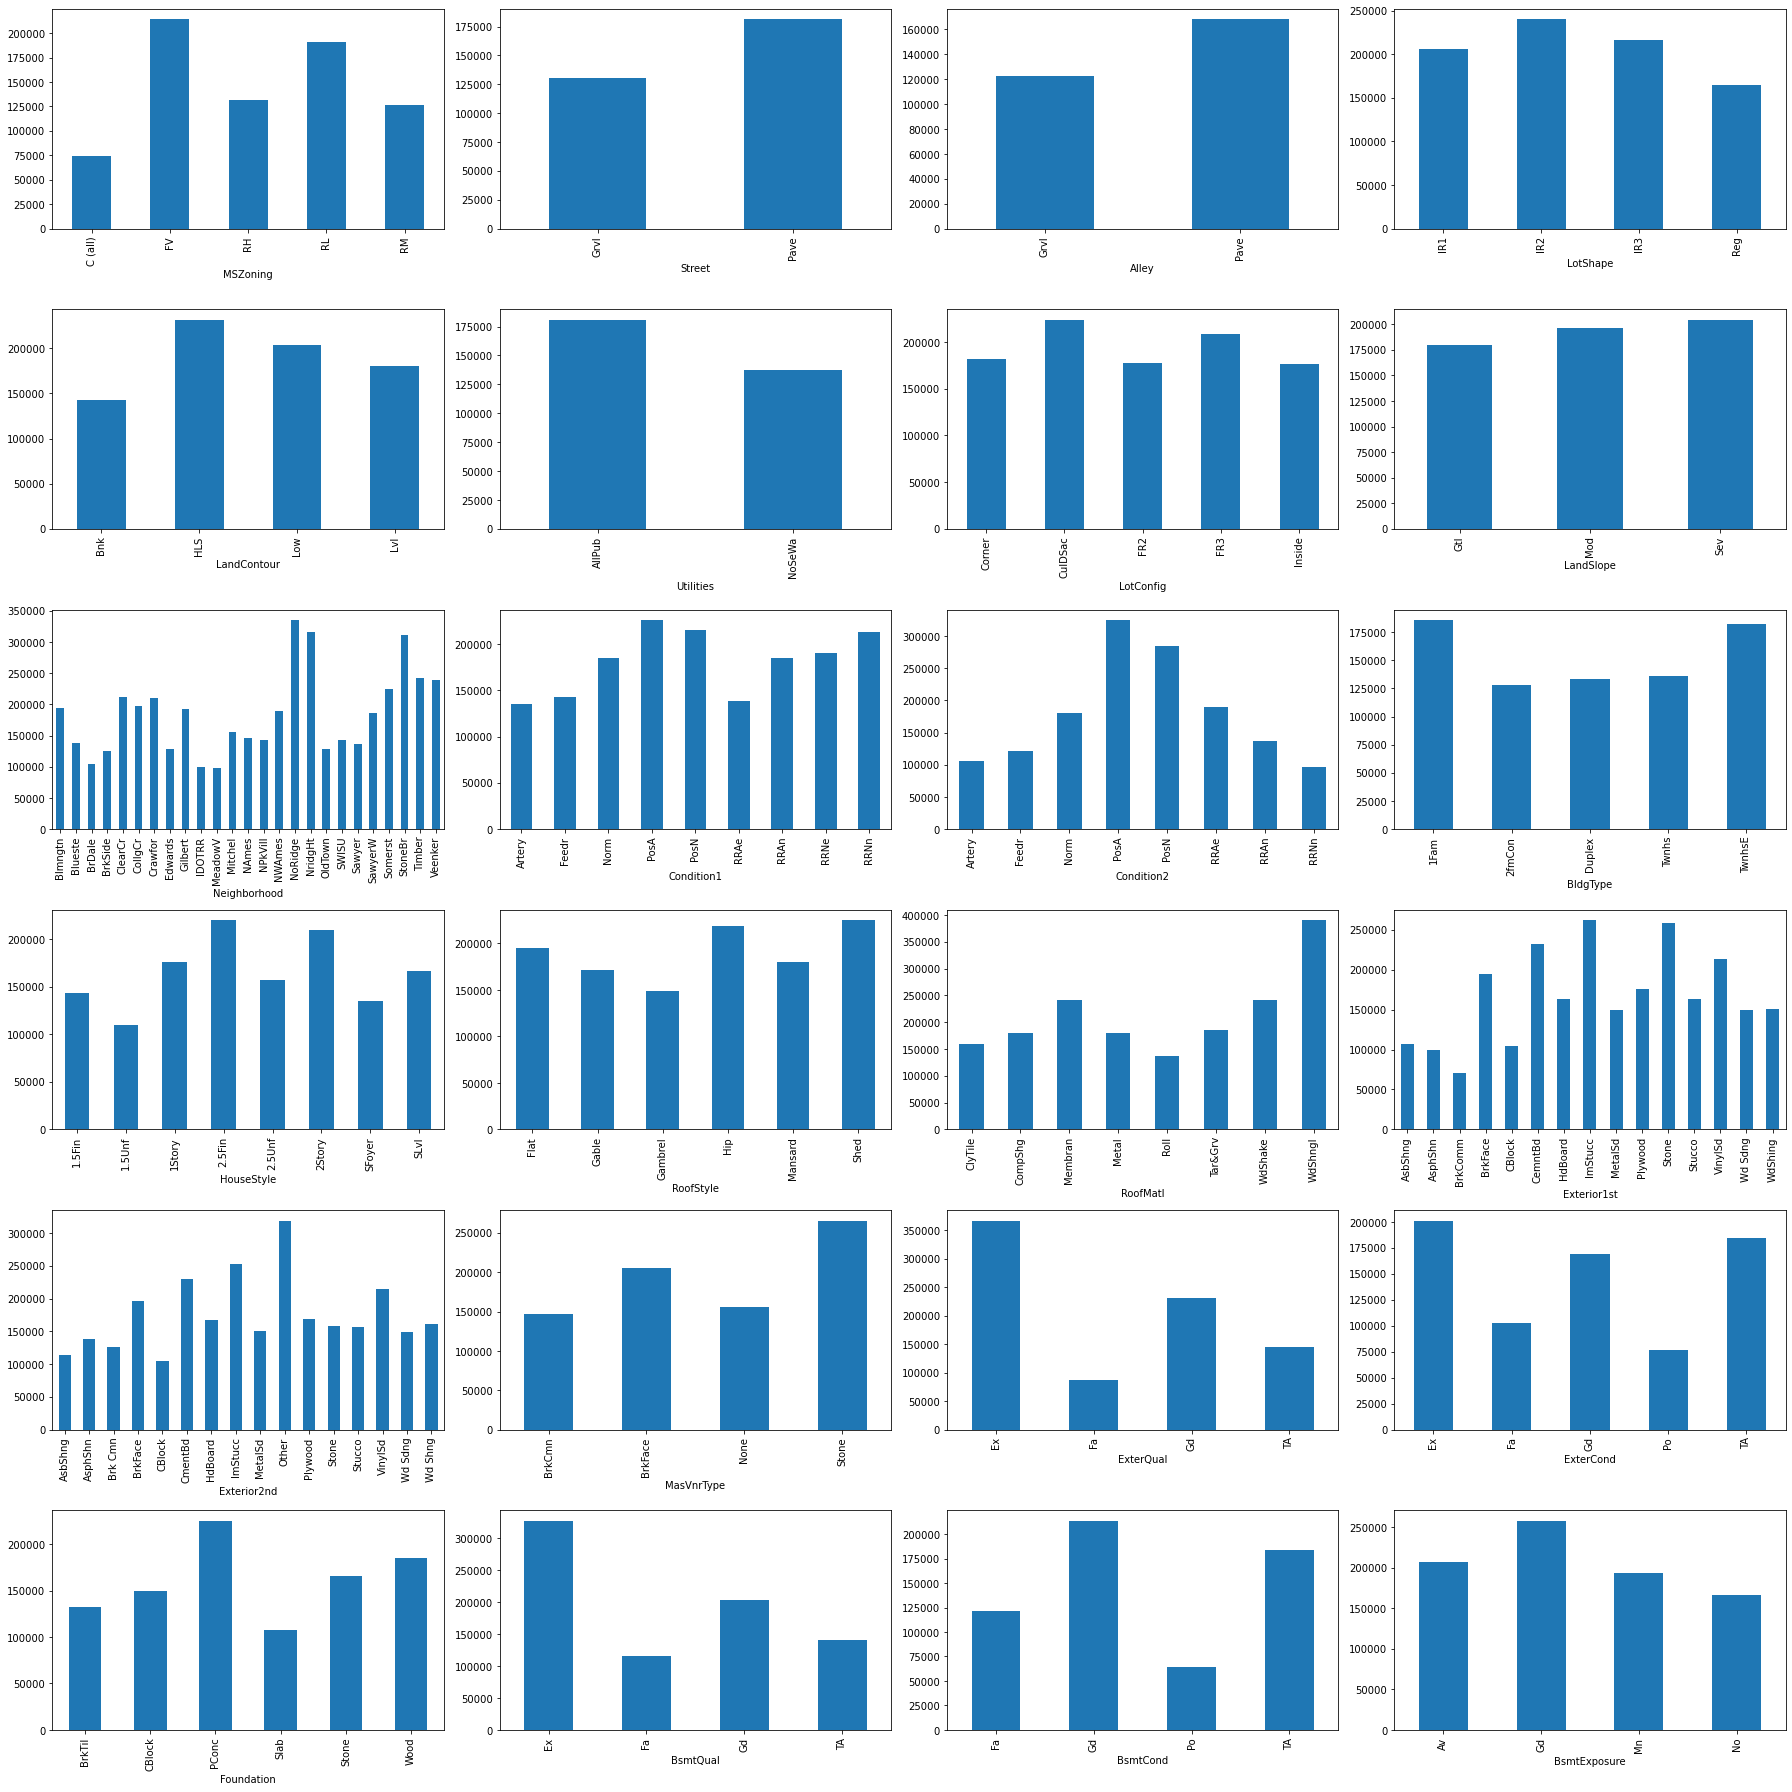

In [23]:
plt.figure(figsize=(25,25))

pl_no=1
for i in cat_cols[:24]:
    plt.subplot(6,4,pl_no)
    data.groupby(i)['SalePrice'].mean().plot(kind='bar')
    plt.xlabel=i
    plt.ylabel="SalePrice"
    pl_no+=1
plt.tight_layout()

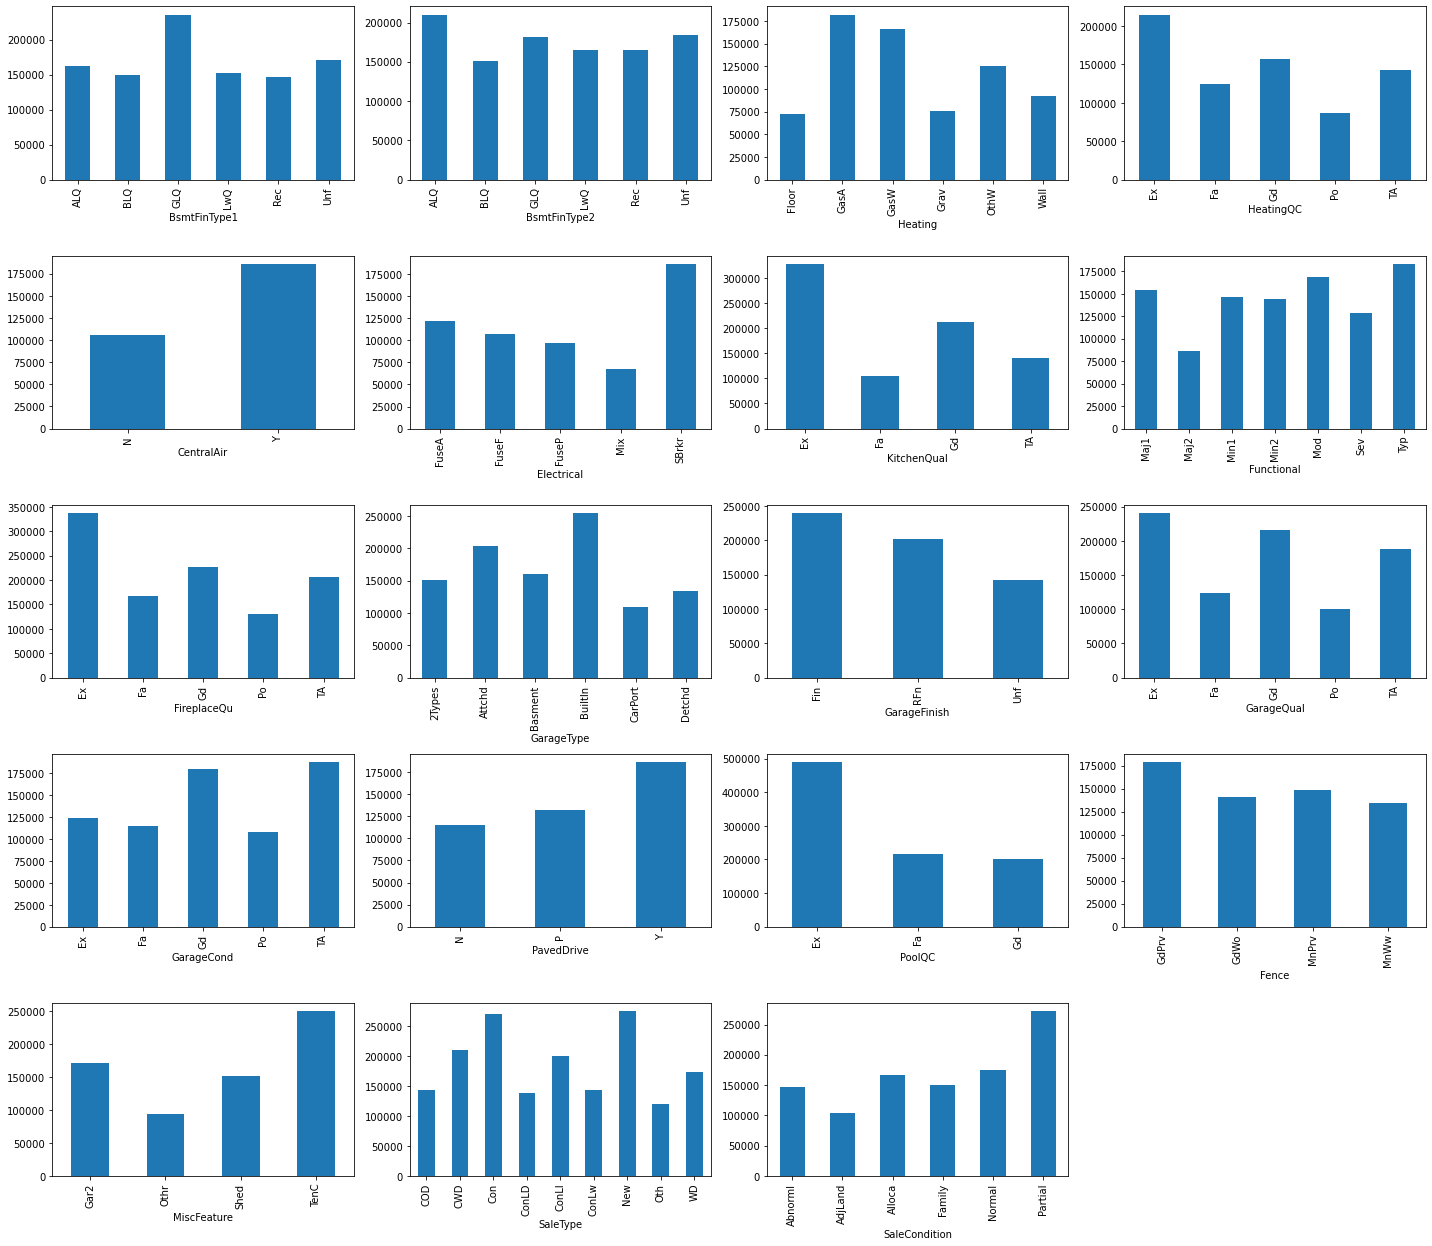

In [24]:
plt.figure(figsize=(20,20))
pl_no=1
for i in cat_cols[24:]:
    plt.subplot(6,4,pl_no)
    data.groupby(i)['SalePrice'].mean().plot(kind='bar')
    plt.xlabel=i
    plt.ylabel='SalePrice'
    pl_no+=1
plt.tight_layout()

In [25]:
cont_cols=[]
for i in numerical_cols:
    if i not in descreate_cols+year_cols+['Id']:
        cont_cols.append(i)

In [26]:
cont_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [27]:
cont_data=data[cont_cols]

In [28]:
cont_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


In [29]:

null_values={'null_count':data.isnull().sum(),'null_percentage':(data.isnull().sum()/len(data))*100,'data_type':data.dtypes}
null=pd.DataFrame(null_values)


null[null['null_percentage']>50]

,null_count,null_percentage,data_type
Alley,1369,93.767123,object
PoolQC,1453,99.520548,object
Fence,1179,80.753425,object
MiscFeature,1406,96.301370,object


In [30]:
null

,null_count,null_percentage,data_type
Id,0,0.000000,int64
MSSubClass,0,0.000000,int64
MSZoning,0,0.000000,object
LotFrontage,259,17.739726,float64
LotArea,0,0.000000,int64
...,...,...,...
MoSold,0,0.000000,int64
YrSold,0,0.000000,int64
SaleType,0,0.000000,object
SaleCondition,0,0.000000,object


In [31]:
null[null['null_percentage']>50].index

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [32]:
data.drop(null[null['null_percentage']>50].index, axis=1,inplace=True)

In [33]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [34]:
null_1=null.drop(null[null['null_percentage']>50].index,axis=0)

In [35]:
null_1

,null_count,null_percentage,data_type
Id,0,0.000000,int64
MSSubClass,0,0.000000,int64
MSZoning,0,0.000000,object
LotFrontage,259,17.739726,float64
LotArea,0,0.000000,int64
...,...,...,...
MoSold,0,0.000000,int64
YrSold,0,0.000000,int64
SaleType,0,0.000000,object
SaleCondition,0,0.000000,object


In [36]:
e=null_1[null_1['null_percentage']>0] # selecting the columns with null values more than 0 for imputation
e

,null_count,null_percentage,data_type
LotFrontage,259,17.739726,float64
MasVnrType,8,0.547945,object
MasVnrArea,8,0.547945,float64
BsmtQual,37,2.534247,object
BsmtCond,37,2.534247,object
BsmtExposure,38,2.602740,object
BsmtFinType1,37,2.534247,object
BsmtFinType2,38,2.602740,object
Electrical,1,0.068493,object
FireplaceQu,690,47.260274,object


In [37]:
for i in e.index:
    if data[i].dtype!='object':
        print(f'mean of {i} -- {np.mean(data[i])}') #gives the mean of all numerical data
        print(f'median of {i} -- {np.median(data[i])}') #gives the median of all the numerical data
        print('===================================')
        
    else:
        print(f'mode of {i} --> {data[i].mode()[0]}') #gives the mode of categorical data
        print('===================================')

mean of LotFrontage -- 70.04995836802665
median of LotFrontage -- nan
mode of MasVnrType --> None
mean of MasVnrArea -- 103.68526170798899
median of MasVnrArea -- nan
mode of BsmtQual --> TA
mode of BsmtCond --> TA
mode of BsmtExposure --> No
mode of BsmtFinType1 --> Unf
mode of BsmtFinType2 --> Unf
mode of Electrical --> SBrkr
mode of FireplaceQu --> Gd
mode of GarageType --> Attchd
mean of GarageYrBlt -- 29.306018854242204
median of GarageYrBlt -- nan
mode of GarageFinish --> Unf
mode of GarageQual --> TA
mode of GarageCond --> TA


In [38]:
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=data['LotFrontage'].mean()

In [39]:
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=data['MasVnrArea'].mean()

In [40]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=data['GarageYrBlt'].mean()

In [41]:
for i in e.index:
    if data[i].dtype=='object': 
        data.loc[data[i].isnull()==True,i]=data[i].mode()

In [42]:
data.loc[data['BsmtQual'].isnull()==True,'BsmtQual']=data['BsmtQual'].mode()

In [43]:
data.loc[data['BsmtCond'].isnull()==True,'BsmtCond']=data['BsmtCond'].mode()

In [44]:
data.loc[data['BsmtExposure'].isnull()==True,'BsmtExposure']=data['BsmtExposure'].mode()

In [45]:
data.loc[data['BsmtFinType1'].isnull()==True,'BsmtFinType1']=data['BsmtFinType1'].mode()

In [46]:
data.loc[data['BsmtFinType2'].isnull()==True,'BsmtFinType2']=data['BsmtFinType2'].mode()

In [47]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [48]:
#outlier handling

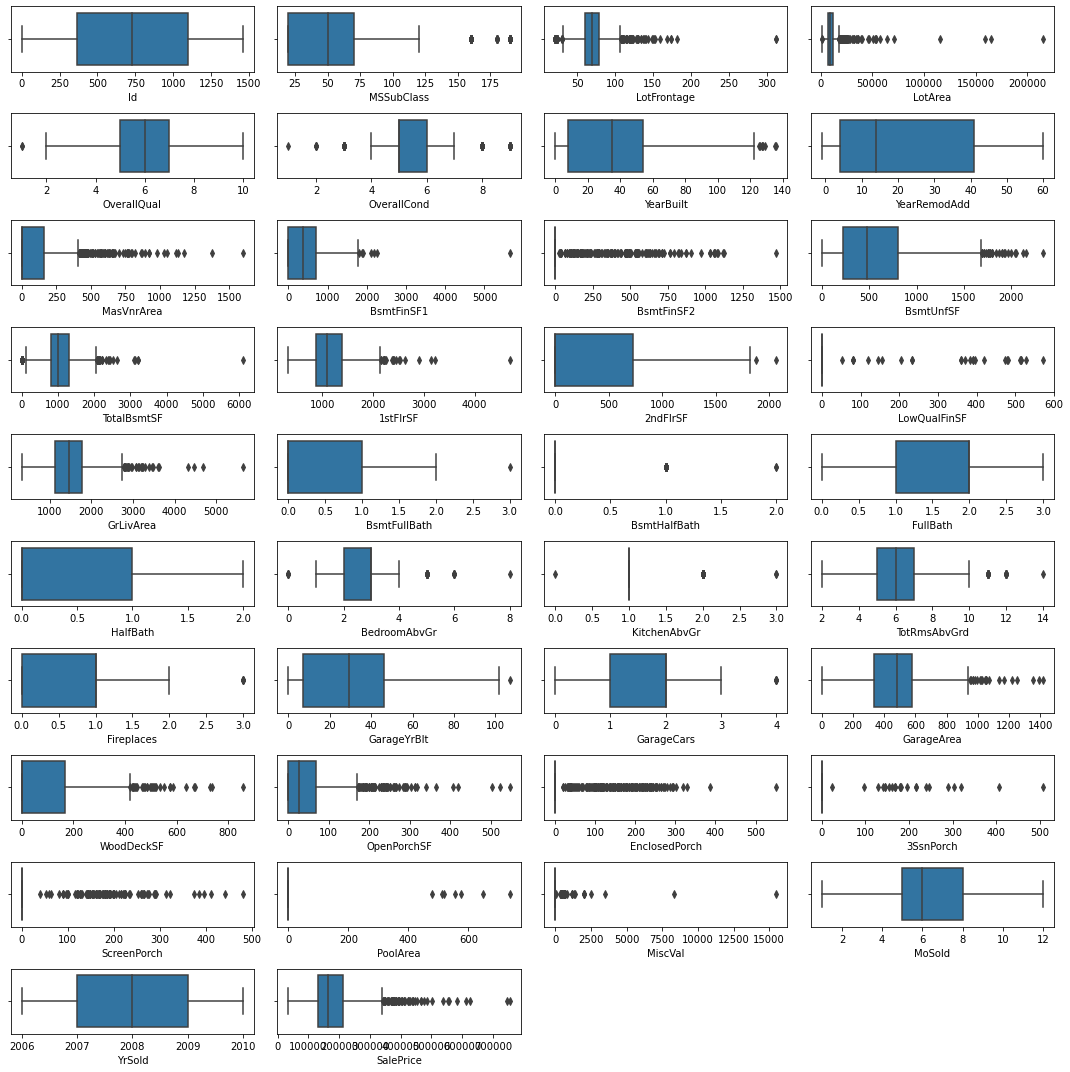

In [49]:
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()

In [50]:
for i in data.columns[1:]:
    if data[i].dtype!='object':
        
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR
        
        print(f'lower limit of {i} ------> {lower_lim}')
        print(f'upper limit of {i} ------> {upper_lim}')
        print('===================================')

lower limit of MSSubClass ------> -55.0
upper limit of MSSubClass ------> 145.0
lower limit of LotFrontage ------> 31.5
upper limit of LotFrontage ------> 107.5
lower limit of LotArea ------> 1481.5
upper limit of LotArea ------> 17673.5
lower limit of OverallQual ------> 2.0
upper limit of OverallQual ------> 10.0
lower limit of OverallCond ------> 3.5
upper limit of OverallCond ------> 7.5
lower limit of YearBuilt ------> -61.0
upper limit of YearBuilt ------> 123.0
lower limit of YearRemodAdd ------> -51.5
upper limit of YearRemodAdd ------> 96.5
lower limit of MasVnrArea ------> -246.375
upper limit of MasVnrArea ------> 410.625
lower limit of BsmtFinSF1 ------> -1068.375
upper limit of BsmtFinSF1 ------> 1780.625
lower limit of BsmtFinSF2 ------> 0.0
upper limit of BsmtFinSF2 ------> 0.0
lower limit of BsmtUnfSF ------> -654.5
upper limit of BsmtUnfSF ------> 1685.5
lower limit of TotalBsmtSF ------> 42.0
upper limit of TotalBsmtSF ------> 2052.0
lower limit of 1stFlrSF ------> 11

In [51]:
for i in data.columns[1:]:
    if data[i].dtype!='object':

        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR

        out_data=data.loc[(data[i]>lower_lim) & (data[i]<upper_lim)]

        print(f'no of rows lost in {i} ------> {len(data)-len(out_data)}')


no of rows lost in MSSubClass ------> 103
no of rows lost in LotFrontage ------> 106
no of rows lost in LotArea ------> 69
no of rows lost in OverallQual ------> 23
no of rows lost in OverallCond ------> 125
no of rows lost in YearBuilt ------> 8
no of rows lost in YearRemodAdd ------> 0
no of rows lost in MasVnrArea ------> 98
no of rows lost in BsmtFinSF1 ------> 7
no of rows lost in BsmtFinSF2 ------> 1460
no of rows lost in BsmtUnfSF ------> 29
no of rows lost in TotalBsmtSF ------> 61
no of rows lost in 1stFlrSF ------> 20
no of rows lost in 2ndFlrSF ------> 2
no of rows lost in LowQualFinSF ------> 1460
no of rows lost in GrLivArea ------> 31
no of rows lost in BsmtFullBath ------> 1
no of rows lost in BsmtHalfBath ------> 1460
no of rows lost in FullBath ------> 0
no of rows lost in HalfBath ------> 0
no of rows lost in BedroomAbvGr ------> 35
no of rows lost in KitchenAbvGr ------> 1460
no of rows lost in TotRmsAbvGrd ------> 78
no of rows lost in Fireplaces ------> 5
no of row

In [52]:
f=[]
for i in data.columns[1:]:
    if data[i].dtype!='object':

        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)

        IQR=Q3-Q1

        lower_lim=Q1-1.5*IQR
        upper_lim=Q3+1.5*IQR

        out_df1=data.loc[(data[i]>lower_lim) & (data[i]<upper_lim)]

        lngt=len(data)-len(out_df1)

        f.append(lngt)


In [53]:
len(f)

37

In [54]:
outlier_data=pd.DataFrame({'column_names':numerical_cols[1:],'outlier_count':f})

In [55]:
outlier_data.head()

,column_names,outlier_count
0,MSSubClass,103
1,LotFrontage,106
2,LotArea,69
3,OverallQual,23
4,OverallCond,125


In [56]:
outlier_data['per_outlier']=100*(outlier_data['outlier_count']/len(data))

In [57]:
outlier_data

,column_names,outlier_count,per_outlier
0,MSSubClass,103,7.054795
1,LotFrontage,106,7.260274
2,LotArea,69,4.726027
3,OverallQual,23,1.575342
4,OverallCond,125,8.561644
5,YearBuilt,8,0.547945
6,YearRemodAdd,0,0.000000
7,MasVnrArea,98,6.712329
8,BsmtFinSF1,7,0.479452
9,BsmtFinSF2,1460,100.000000


In [58]:
data.drop(outlier_data[outlier_data['per_outlier']==100]['column_names'],axis=1,inplace=True)

In [59]:
data.shape

(1460, 68)

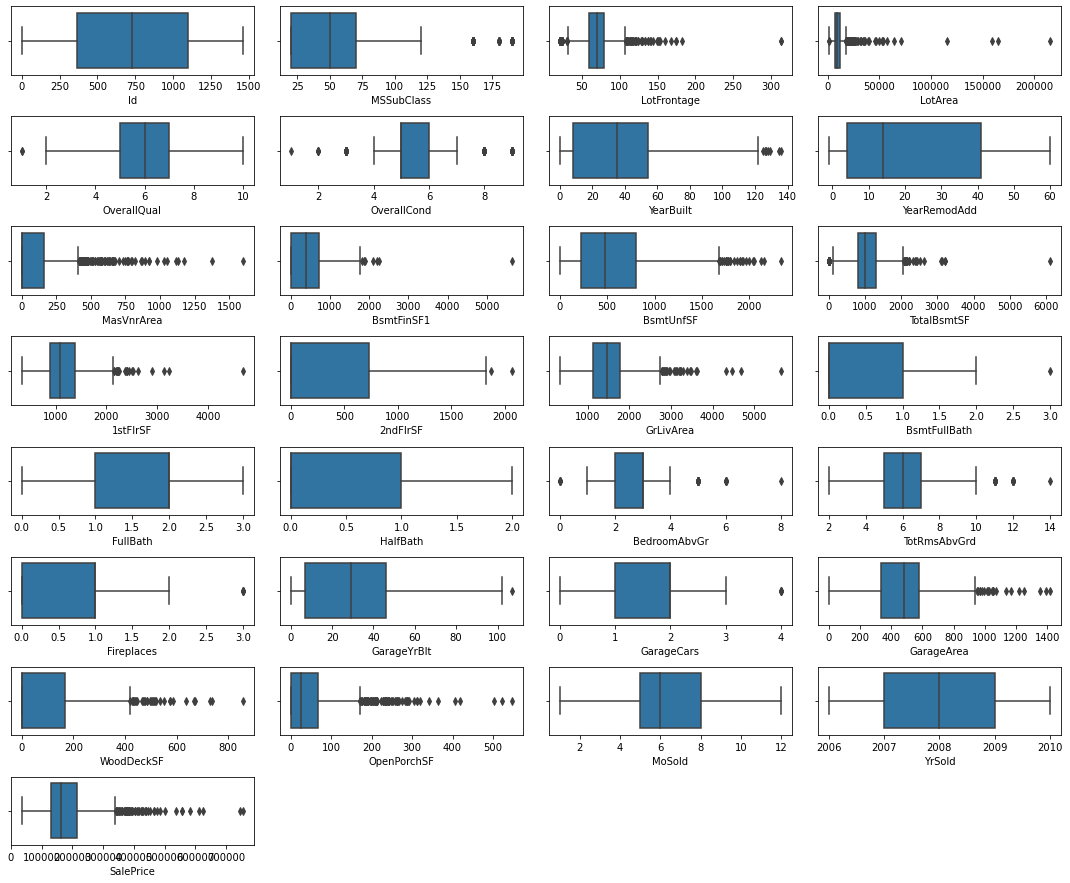

In [60]:
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()

In [61]:
outlier_data.loc[(outlier_data['per_outlier']>0) & (outlier_data['per_outlier']<100)]

,column_names,outlier_count,per_outlier
0,MSSubClass,103,7.054795
1,LotFrontage,106,7.260274
2,LotArea,69,4.726027
3,OverallQual,23,1.575342
4,OverallCond,125,8.561644
5,YearBuilt,8,0.547945
7,MasVnrArea,98,6.712329
8,BsmtFinSF1,7,0.479452
10,BsmtUnfSF,29,1.986301
11,TotalBsmtSF,61,4.178082


In [62]:
#outlier elimination
print(len(data.loc[data['MSSubClass']>145]))

103


In [63]:
data.drop(data.loc[data['MSSubClass']>145].index,inplace=True)

In [64]:
print(len(data.loc[data['LotFrontage']>100]))

83


In [65]:
data.drop(data[data['LotFrontage']>100].index,inplace=True)

In [66]:
data.shape

(1274, 68)

In [67]:
print(len(data.loc[data['LotArea']>18000]))

45


In [68]:
data.drop(data[data['LotArea']>18000].index,inplace=True)

print(len(data.loc[(data['OverallCond']<4) | (data['OverallCond']>7)]))

107


In [69]:
data.drop(data.loc[(data['OverallCond']<4) | (data['OverallCond']>7)].index,inplace=True)

In [70]:
print(len(data.loc[data['MasVnrArea']>450]))

49


In [71]:
data.drop(data.loc[data['MasVnrArea']>450].index,inplace=True)

In [72]:
print(len(data.loc[data['TotRmsAbvGrd']>10]))

16


In [73]:
data.drop(data.loc[data['TotRmsAbvGrd']>10].index,inplace=True)

In [74]:
print(len(data.loc[data['OpenPorchSF']>170]))

46


In [75]:
data.drop(data.loc[data['OpenPorchSF']>170].index,inplace=True)

In [76]:
data.shape

(1011, 68)

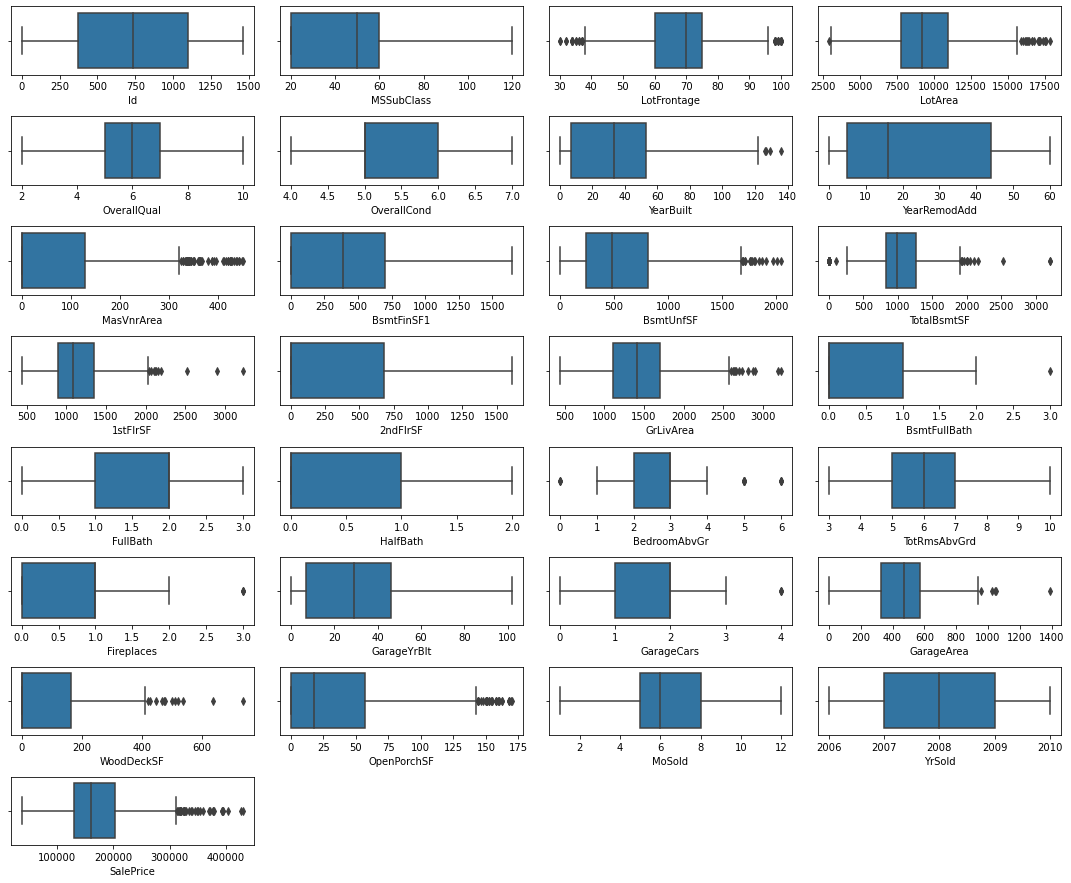

In [77]:
plt.figure(figsize=(15,15))
plt_no=1
for i in data.columns:
    if data[i].dtype!='object':
        plt.subplot(10,4,plt_no)
        sns.boxplot(x=i,data=data)
        plt.xlabel=i
        plt_no+=1
plt.tight_layout()

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [79]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=encoder.fit_transform(data[i])

In [80]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,4,4,2,0,61,2,2008,8,4,208500
2,3,60,3,68.0,11250,1,0,3,0,4,...,4,4,2,0,42,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,4,4,2,0,35,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,4,4,2,192,84,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,0,3,0,4,...,4,4,2,40,30,10,2009,8,4,143000


In [81]:
data.shape

(1011, 68)

<AxesSubplot:>

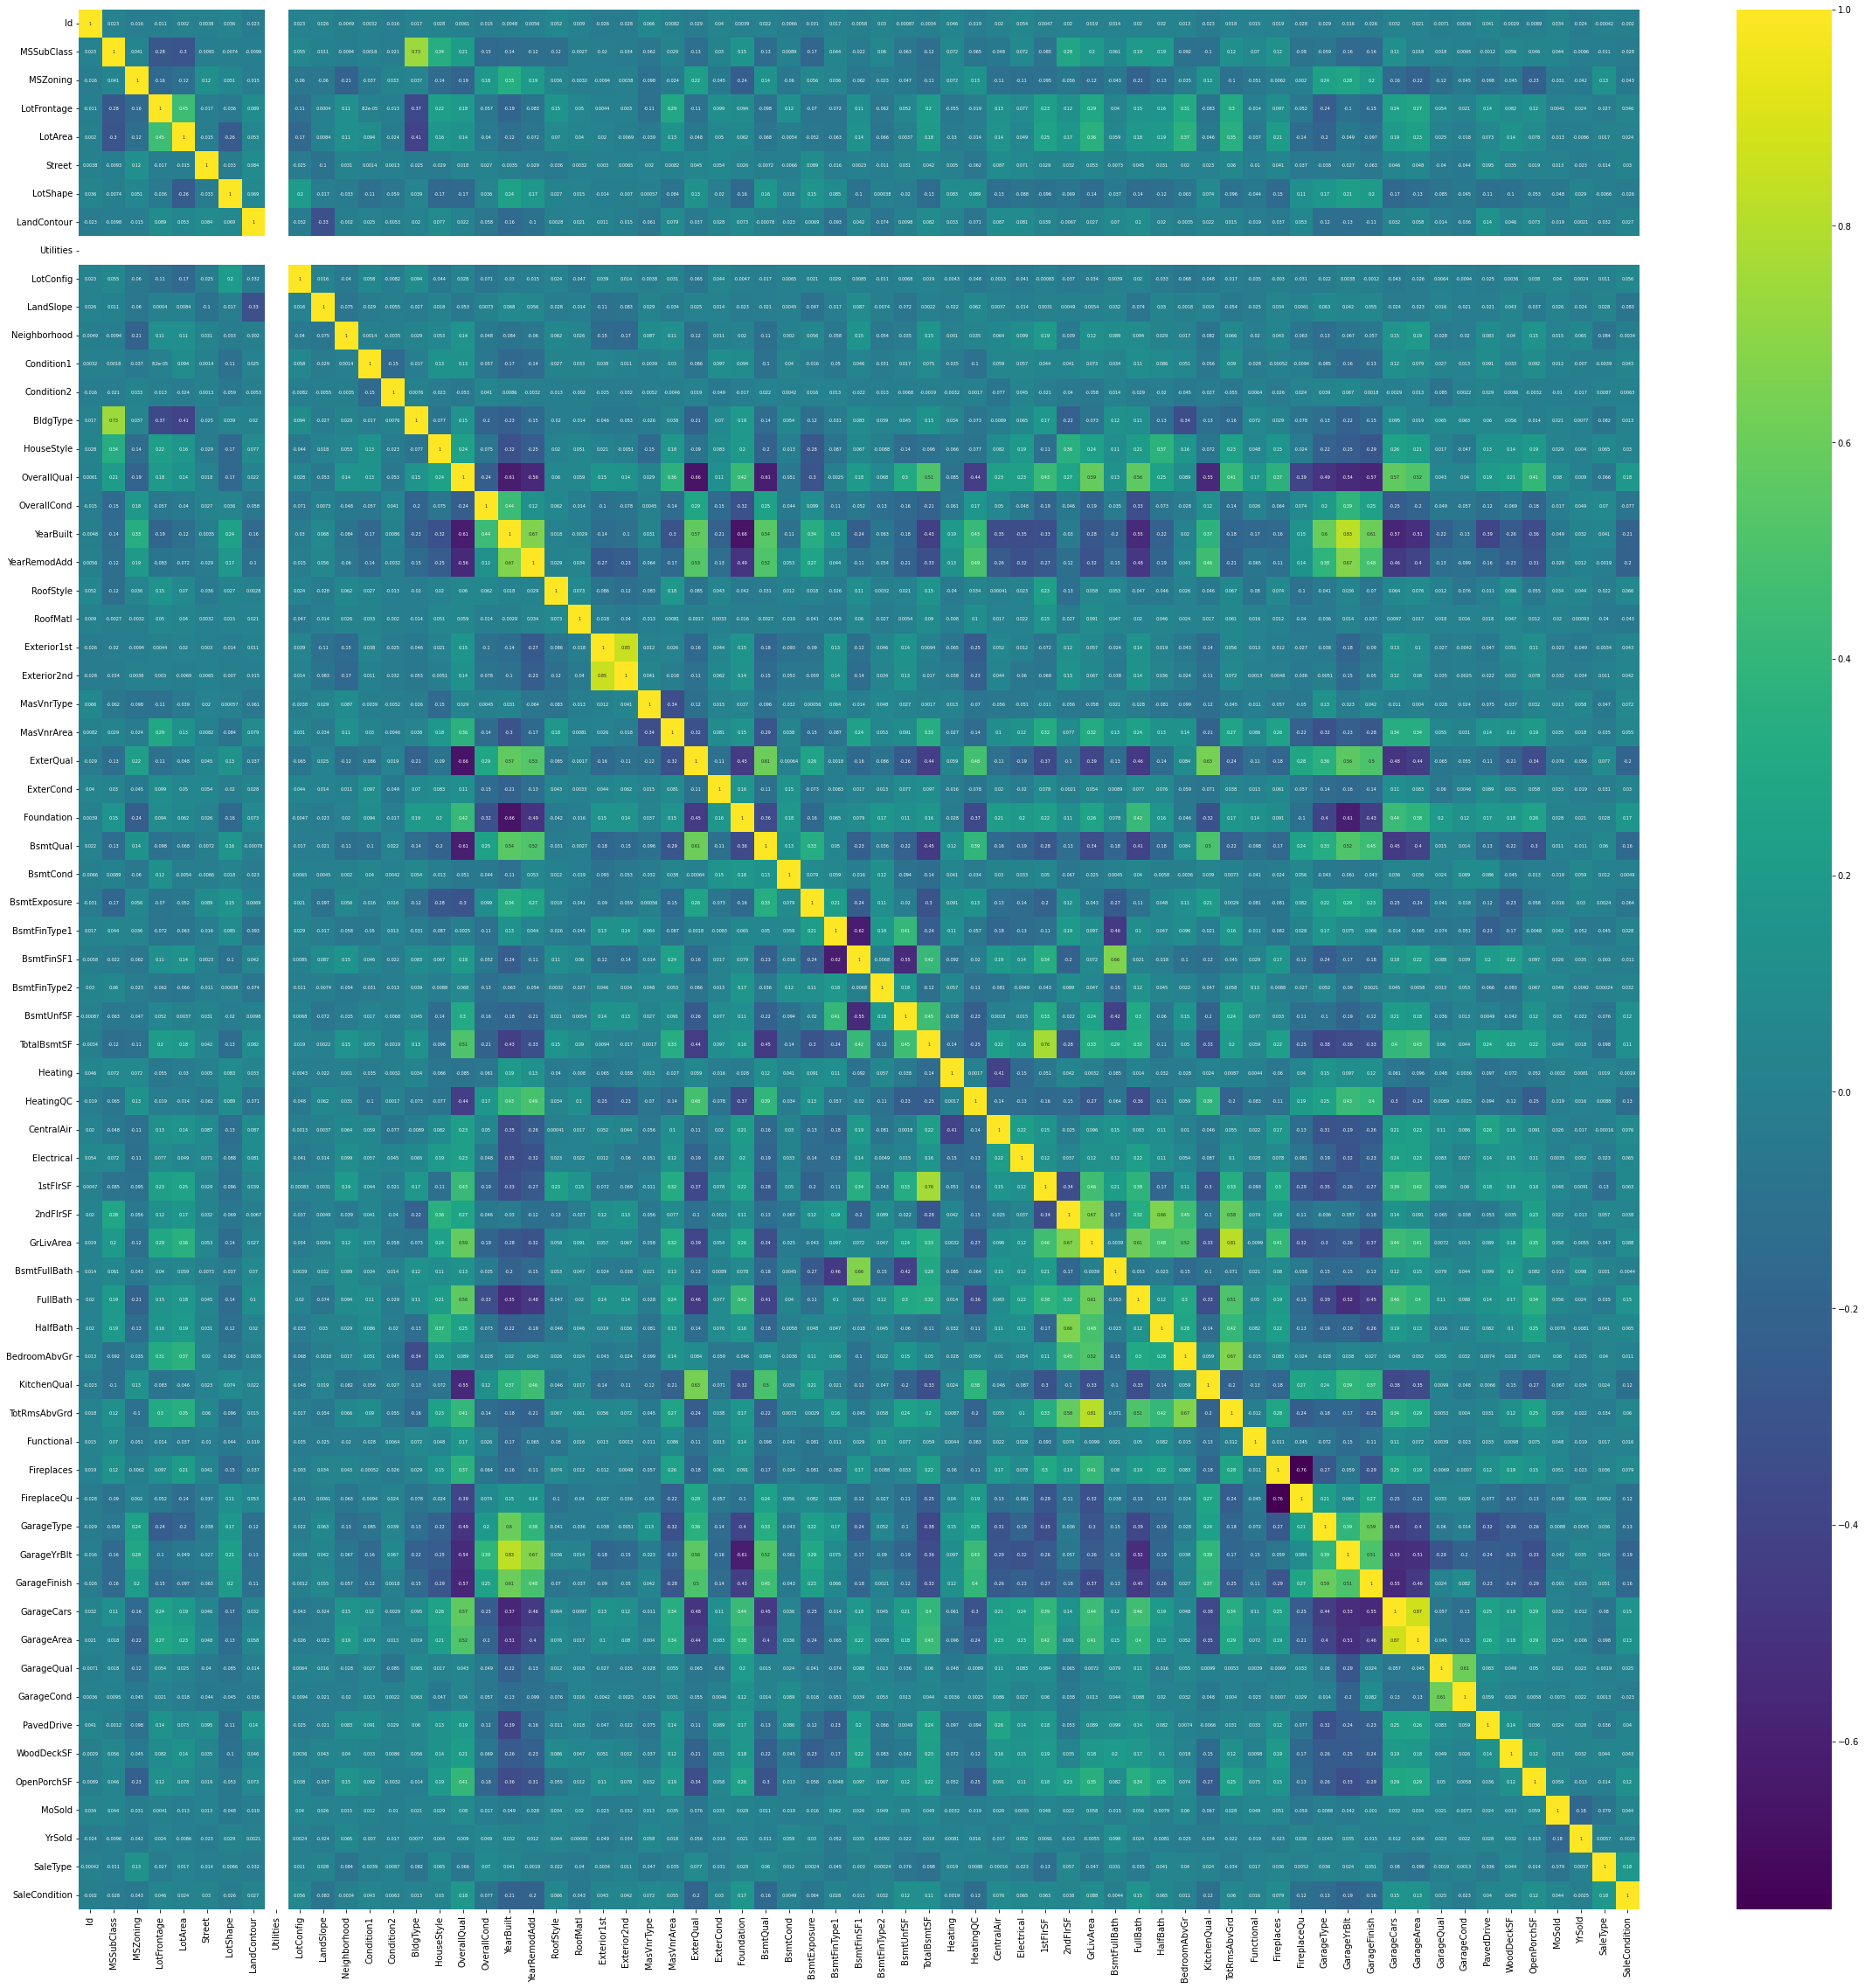

In [82]:
#feature Selection
plt.figure(figsize=(40,40))
sns.heatmap(data.iloc[:,:-1].corr(),annot=True,annot_kws={'size':5},cmap='viridis')

In [83]:
data.drop('Id',axis=1,inplace=True)

In [84]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,4,4,2,0,61,2,2008,8,4,208500
2,60,3,68.0,11250,1,0,3,0,4,0,...,4,4,2,0,42,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,4,4,2,0,35,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,4,4,2,192,84,12,2008,8,4,250000
5,50,3,85.0,14115,1,0,3,0,4,0,...,4,4,2,40,30,10,2009,8,4,143000


In [85]:
X=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [86]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,548,4,4,2,0,61,2,2008,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,608,4,4,2,0,42,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,642,4,4,2,0,35,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,836,4,4,2,192,84,12,2008,8,4
5,50,3,85.0,14115,1,0,3,0,4,0,...,480,4,4,2,40,30,10,2009,8,4


In [87]:
y.head()

0    208500
2    223500
3    140000
4    250000
5    143000
Name: SalePrice, dtype: int64

In [88]:
# mutual_info
from sklearn.feature_selection import mutual_info_regression

In [89]:
mutual_info=mutual_info_regression(X,y)

<AxesSubplot:>

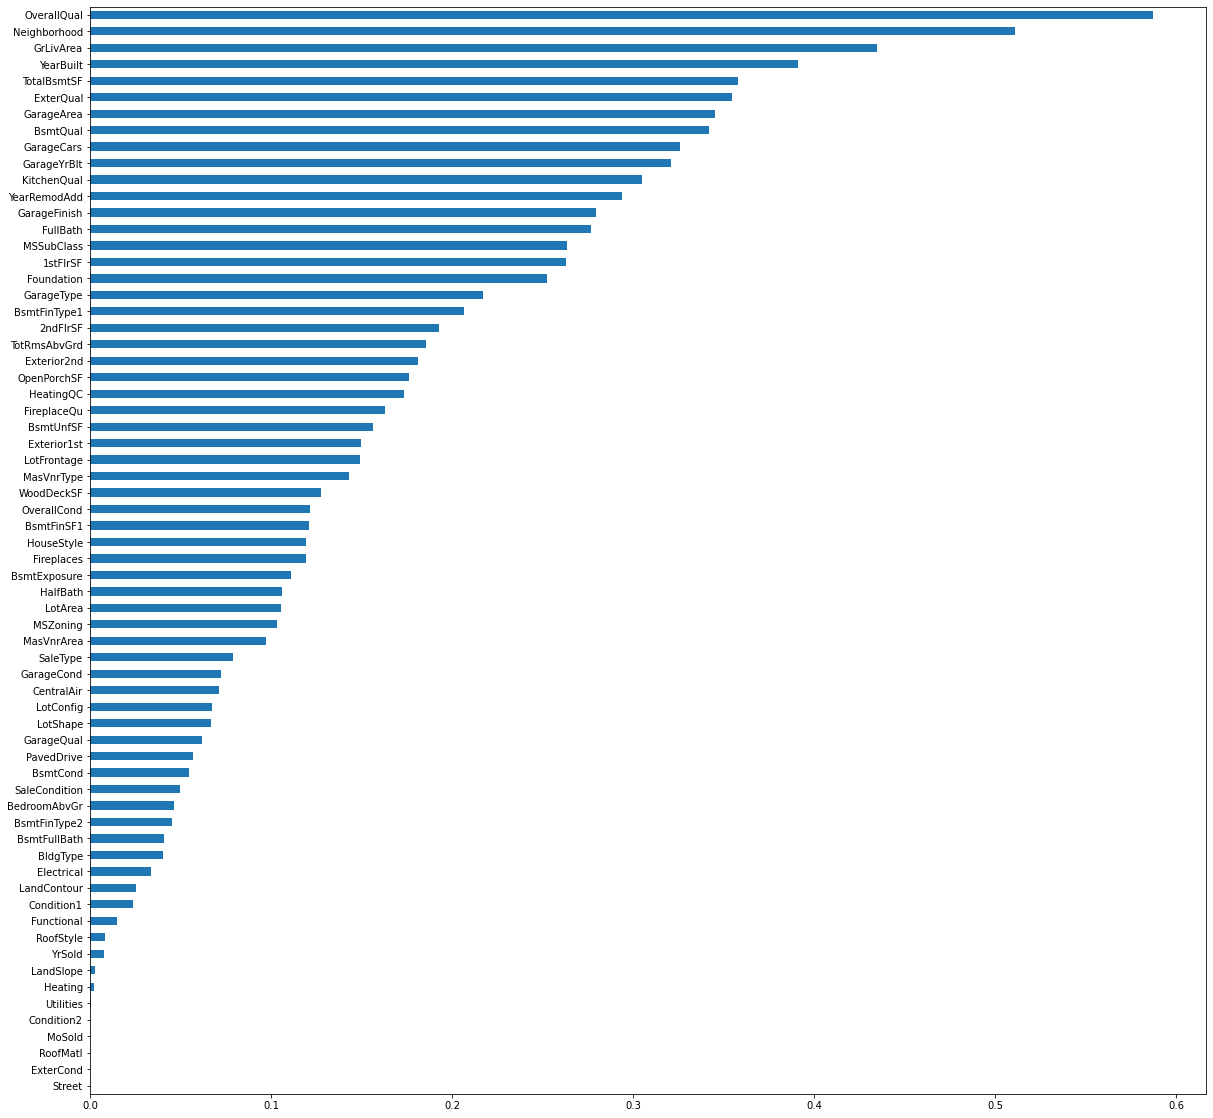

In [90]:
plt.figure(figsize=(20,20))
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=True).plot(kind='barh')

In [91]:
len(mutual_data.sort_values(ascending=False))

66

In [92]:
mutual_data.sort_values(ascending=False)

OverallQual      0.586980
Neighborhood     0.510847
GrLivArea        0.434456
YearBuilt        0.391277
TotalBsmtSF      0.358007
ExterQual        0.354684
GarageArea       0.345242
BsmtQual         0.342019
GarageCars       0.325624
GarageYrBlt      0.320846
KitchenQual      0.304989
YearRemodAdd     0.293783
GarageFinish     0.279560
FullBath         0.276593
MSSubClass       0.263631
1stFlrSF         0.262903
Foundation       0.252473
GarageType       0.216906
BsmtFinType1     0.206787
2ndFlrSF         0.192703
TotRmsAbvGrd     0.185504
Exterior2nd      0.181175
OpenPorchSF      0.176200
HeatingQC        0.173431
FireplaceQu      0.162732
BsmtUnfSF        0.156313
Exterior1st      0.149459
LotFrontage      0.149340
MasVnrType       0.143237
WoodDeckSF       0.127618
OverallCond      0.121296
BsmtFinSF1       0.120985
HouseStyle       0.119410
Fireplaces       0.119142
BsmtExposure     0.110951
HalfBath         0.106072
LotArea          0.105573
MSZoning         0.103193
MasVnrArea  

In [93]:
mutual_data.sort_values(ascending=False)[:-9]

OverallQual      0.586980
Neighborhood     0.510847
GrLivArea        0.434456
YearBuilt        0.391277
TotalBsmtSF      0.358007
ExterQual        0.354684
GarageArea       0.345242
BsmtQual         0.342019
GarageCars       0.325624
GarageYrBlt      0.320846
KitchenQual      0.304989
YearRemodAdd     0.293783
GarageFinish     0.279560
FullBath         0.276593
MSSubClass       0.263631
1stFlrSF         0.262903
Foundation       0.252473
GarageType       0.216906
BsmtFinType1     0.206787
2ndFlrSF         0.192703
TotRmsAbvGrd     0.185504
Exterior2nd      0.181175
OpenPorchSF      0.176200
HeatingQC        0.173431
FireplaceQu      0.162732
BsmtUnfSF        0.156313
Exterior1st      0.149459
LotFrontage      0.149340
MasVnrType       0.143237
WoodDeckSF       0.127618
OverallCond      0.121296
BsmtFinSF1       0.120985
HouseStyle       0.119410
Fireplaces       0.119142
BsmtExposure     0.110951
HalfBath         0.106072
LotArea          0.105573
MSZoning         0.103193
MasVnrArea  

In [94]:
X_selected=X[mutual_data.sort_values(ascending=False)[:-9].index]

In [95]:
X_selected.head()

,OverallQual,Neighborhood,GrLivArea,YearBuilt,TotalBsmtSF,ExterQual,GarageArea,BsmtQual,GarageCars,GarageYrBlt,...,SaleCondition,BedroomAbvGr,BsmtFinType2,BsmtFullBath,BldgType,Electrical,LandContour,Condition1,Functional,RoofStyle
0,7,3,1710,5,856,2,548,2,2,5.0,...,4,3,5,1,0,3,3,2,5,1
2,7,3,1786,7,920,2,608,2,2,7.0,...,4,3,5,1,0,3,3,2,5,1
3,7,4,1717,91,756,3,642,3,3,8.0,...,0,3,5,1,0,3,3,2,5,1
4,8,13,2198,8,1145,2,836,2,3,8.0,...,4,4,5,1,0,3,3,2,5,1
5,5,9,1362,16,796,3,480,2,2,16.0,...,4,1,5,1,0,3,3,2,5,1


In [96]:
#scaling of data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=StandardScaler()

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(707, 57)
(304, 57)
(707,)
(304,)


In [99]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [100]:
#Model creation

# Linear Regression Model

In [101]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [102]:
all_model={'model_name':[],'r2_score':[],'mae':[],'mse':[]}  #dictionary initialization for test data
all_model1={'model_name':[],'r2_score_train':[],'mae_train':[],'mse_train':[]} #dictionary for train data

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [104]:
lr_model=LinearRegression()

In [105]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [106]:
#predicting on test data
lr_pred=lr_model.predict(X_test_scaled)

#metrics on test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,lr_pred))
print('mae score is ',mean_absolute_error(y_test,lr_pred))  
print('mse score is ',mean_squared_error(y_test,lr_pred)) 
print('\n')

#appending the data to model dictionaries
all_model['model_name'].append('linear_reg')
all_model['r2_score'].append(r2_score(y_test,lr_pred))
all_model['mae'].append(mean_absolute_error(y_test,lr_pred))
all_model['mse'].append(mean_squared_error(y_test,lr_pred))

#predicting on train data
lr_pred_train=lr_model.predict(X_train_scaled)

#metrics on train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,lr_pred_train))
print('mae score is ',mean_absolute_error(y_train,lr_pred_train))  
print('mse score is ',mean_squared_error(y_train,lr_pred_train))

#appending the data to train dictionary
all_model1['model_name'].append('linear_reg')
all_model1['r2_score_train'].append(r2_score(y_train,lr_pred_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,lr_pred_train))
all_model1['mse_train'].append(mean_squared_error(y_train,lr_pred_train))

metrics on test data
r2 score is  0.8977379474156457
mae score is  15057.594545473903
mse score is  379001118.09825534


metrics on train data
r2 score is  0.8972297344164064
mae score is  13849.662962034616
mse score is  388188304.917048


In [107]:
from sklearn.linear_model import Ridge

ridge_regresser=Ridge()

#hyperparameters of ridge model
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_grid=GridSearchCV(ridge_regresser,param_grid=params_Ridge)

In [108]:
ridge_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [109]:
ridge_grid.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}

In [110]:
ridge_regresser1=Ridge(alpha=1 , fit_intercept=True ,solver='cholesky')

In [111]:
#fitting on training data
ridge_regresser1.fit(X_train_scaled,y_train)

#predicting  on test data
ridge_pred1=ridge_regresser1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ridge_pred1))
print('mae score is ',mean_absolute_error(y_test,ridge_pred1))  
print('mse score is ',mean_squared_error(y_test,ridge_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ridge_regresser1')
all_model['r2_score'].append(r2_score(y_test,ridge_pred1))
all_model['mae'].append(mean_absolute_error(y_test,ridge_pred1))
all_model['mse'].append(mean_squared_error(y_test,ridge_pred1))

#predicting on train data
ridge_regresser1_train=ridge_regresser1.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ridge_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,ridge_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,ridge_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('ridge_regresser1')
all_model1['r2_score_train'].append(r2_score(y_train,ridge_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ridge_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ridge_regresser1_train))

metrics on test data
r2 score is  0.8979807836355909
mae score is  15042.964141036451
mse score is  378101124.43933636


metrics on train data
r2 score is  0.8972205535761857
mae score is  13854.012376079665
mse score is  388222983.1849568


In [112]:
#Lasso regression model
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
params_lasso={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
lasso_grid=GridSearchCV(lasso_reg,param_grid=params_lasso)

In [113]:
lasso_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})

In [114]:
lasso_grid.best_params_

{'alpha': 1}

In [115]:
lasso_reg1=Lasso(alpha=1)

In [116]:
#fitting on training data
lasso_reg1.fit(X_train_scaled,y_train)

#predicting  on test data
lasso_pred1=lasso_reg1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,lasso_pred1))
print('mae score is ',mean_absolute_error(y_test,lasso_pred1))  
print('mse score is ',mean_squared_error(y_test,lasso_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('lasso_reg1')
all_model['r2_score'].append(r2_score(y_test,lasso_pred1))
all_model['mae'].append(mean_absolute_error(y_test,lasso_pred1))
all_model['mse'].append(mean_squared_error(y_test,lasso_pred1))

#predicting on train data
lasso_regresser1_train=lasso_reg1.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,lasso_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,lasso_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,lasso_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('lasso_reg1')
all_model1['r2_score_train'].append(r2_score(y_train,lasso_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,lasso_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,lasso_regresser1_train))


metrics on test data
r2 score is  0.897752832011824
mae score is  15056.19313895389
mse score is  378945953.17195624


metrics on train data
r2 score is  0.8972296665867521
mae score is  13849.3841524437
mse score is  388188561.12616044


In [117]:
#SVM Regression
from sklearn.svm import SVR

In [118]:
svr_model=SVR()

In [119]:

#fitting on training data
svr_model.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred=svr_model.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,svr_pred))
print('mae score is ',mean_absolute_error(y_test,svr_pred))  
print('mse score is ',mean_squared_error(y_test,svr_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('svr_model')
all_model['r2_score'].append(r2_score(y_test,svr_pred))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred))
all_model['mse'].append(mean_squared_error(y_test,svr_pred))

#predicting on train data
sv_regresser1_train=svr_model.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,sv_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser1_train))

metrics on test data
r2 score is  -0.016543009788674068
mae score is  46128.784491726605
mse score is  3767486839.627724


metrics on train data
r2 score is  -0.03216730389539091
mae score is  46697.7006027843
mse score is  3898747111.478865


In [120]:
#Grid search cv-SVM

In [121]:
params=[{'C':[1,10,100],
        'kernel':['rbf','linear','ploy'],
        'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        }]

grid_search=GridSearchCV(SVR(),
                        param_grid=params,
                        n_jobs=-1,
                        scoring='r2'
                        )

grid_search.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf', 'linear', 'ploy']}],
             scoring='r2')

In [122]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}
0.8550892748101067


In [123]:
svr_model1=SVR(C=100,gamma=0.1,kernel='linear')

In [124]:
#fitting on training data
svr_model1.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred1=svr_model1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,svr_pred1))
print('mae score is ',mean_absolute_error(y_test,svr_pred1))  
print('mse score is ',mean_squared_error(y_test,svr_pred1))  
print('\n')

#appending to dictionary 
all_model['model_name'].append('svr_model1')
all_model['r2_score'].append(r2_score(y_test,svr_pred1))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred1))
all_model['mse'].append(mean_squared_error(y_test,svr_pred1))

#predicting on train data
sv_regresser2_train=svr_model1.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,sv_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model1')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser2_train))

metrics on test data
r2 score is  0.8857688049730151
mae score is  14990.976623430131
mse score is  423360861.0702864


metrics on train data
r2 score is  0.869434127963743
mae score is  14194.841179218532
mse score is  493179075.27001756


In [125]:
rand_search=RandomizedSearchCV(SVR(),
                         param_distributions=params,
                         cv=5,
                         n_jobs=-1,
                         scoring='r2'
                         )

rand_search.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100],
                                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                   0.7, 0.8, 0.9],
                                         'kernel': ['rbf', 'linear', 'ploy']}],
                   scoring='r2')

In [126]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'kernel': 'linear', 'gamma': 0.5, 'C': 100}
0.8550892748101067


In [127]:
svr_model2=SVR(C= 100, gamma= 0.1, kernel= 'poly')

In [128]:
#fitting on training data
svr_model2.fit(X_train_scaled,y_train)

#predicting  on test data
svr_pred2=svr_model2.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,svr_pred2))
print('mae score is ',mean_absolute_error(y_test,svr_pred2))  
print('mse score is ',mean_squared_error(y_test,svr_pred2))  
print('\n')

#appending to dictionary 
print('metrics on train data')
all_model['model_name'].append('svr_model2')
all_model['r2_score'].append(r2_score(y_test,svr_pred2))
all_model['mae'].append(mean_absolute_error(y_test,svr_pred2))
all_model['mse'].append(mean_squared_error(y_test,svr_pred2))

#predicting on train data
sv_regresser3_train=svr_model2.predict(X_train_scaled)

#metrics related to train data
print('r2 score is ',r2_score(y_train,sv_regresser3_train))
print('mae score is ',mean_absolute_error(y_train,sv_regresser3_train))  
print('mse score is ',mean_squared_error(y_train,sv_regresser3_train))

#appending to dictionary 
all_model1['model_name'].append('svr_model2')
all_model1['r2_score_train'].append(r2_score(y_train,sv_regresser3_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,sv_regresser3_train))
all_model1['mse_train'].append(mean_squared_error(y_train,sv_regresser3_train))

metrics on test data
r2 score is  0.867960037204619
mae score is  16701.6566634267
mse score is  489363280.59542423


metrics on train data
r2 score is  0.9297998186380079
mae score is  7871.103248030044
mse score is  265163170.03788558


In [129]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [130]:
dt_model=DecisionTreeRegressor()

In [131]:
#fitting on training data
dt_model.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred=dt_model.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,dt_pred))
print('mae score is ',mean_absolute_error(y_test,dt_pred))  
print('mse score is ',mean_squared_error(y_test,dt_pred))  
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model')
all_model['r2_score'].append(r2_score(y_test,dt_pred))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred))
all_model['mse'].append(mean_squared_error(y_test,dt_pred))

#predicting on train data
dt_regresser_train=dt_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,dt_regresser_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser_train))


metrics on test data
r2 score is  0.7365519383202397
mae score is  21807.467105263157
mse score is  976384762.6184211


metrics on train data
r2 score is  1.0
mae score is  0.0
mse score is  0.0


In [132]:
##Gridsearchcv- Decision tree
parameters={"splitter":["best","random"],
           "max_depth":[1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":['auto','log2','sqrt',None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [133]:
grid_search1=GridSearchCV(DecisionTreeRegressor(),
                         param_grid=parameters,
                         cv=5,
                         n_jobs=-1,
                         scoring='r2'
                         )
grid_search1.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [134]:
print(grid_search1.best_params_)


{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [135]:
dt_model1=DecisionTreeRegressor(max_depth= 5, max_features= 'auto', max_leaf_nodes= None, min_samples_leaf= 1, min_weight_fraction_leaf= 0.1, splitter= 'best')


In [136]:
#fitting on training data
dt_model1.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred1=dt_model1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,dt_pred1))
print('mae score is ',mean_absolute_error(y_test,dt_pred1))  
print('mse score is ',mean_squared_error(y_test,dt_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model1')
all_model['r2_score'].append(r2_score(y_test,dt_pred1))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred1))
all_model['mse'].append(mean_squared_error(y_test,dt_pred1))

#predicting on train data
dt_regresser1_train=dt_model1.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,dt_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model1')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser1_train))

metrics on test data
r2 score is  0.6842485077467195
mae score is  24383.41394912797
mse score is  1170230457.739658


metrics on train data
r2 score is  0.726731889875609
mae score is  22916.903014842363
mse score is  1032200158.8172139


In [137]:
##randomsearch cv-decision tree
rand_search1=RandomizedSearchCV(DecisionTreeRegressor(),
                                param_distributions=parameters,
                                cv=5,
                                n_jobs=-1,
                                scoring='r2'
                               )
rand_search1.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],


In [138]:
print(rand_search1.best_params_)
print(rand_search1.best_score_)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 11}
0.7135386187429086


In [139]:
dt_model2=DecisionTreeRegressor(max_depth=9,max_features='auto',
                               max_leaf_nodes=60,min_samples_leaf=2,
                               min_weight_fraction_leaf=0.1,splitter='best')

In [140]:
#fitting on training data
dt_model2.fit(X_train_scaled,y_train)

#predicting  on test data
dt_pred2=dt_model2.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,dt_pred2))
print('mae score is ',mean_absolute_error(y_test,dt_pred2))  
print('mse score is ',mean_squared_error(y_test,dt_pred2)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('dt_model2')
all_model['r2_score'].append(r2_score(y_test,dt_pred2))
all_model['mae'].append(mean_absolute_error(y_test,dt_pred2))
all_model['mse'].append(mean_squared_error(y_test,dt_pred2))

#predicting on train data
dt_regresser2_train=dt_model2.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,dt_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,dt_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,dt_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('dt_model2')
all_model1['r2_score_train'].append(r2_score(y_train,dt_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,dt_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,dt_regresser2_train))

metrics on test data
r2 score is  0.6842485077467195
mae score is  24383.41394912797
mse score is  1170230457.739658


metrics on train data
r2 score is  0.726731889875609
mae score is  22916.903014842363
mse score is  1032200158.8172139


In [141]:
##RAndom forest regression
from sklearn.ensemble import RandomForestRegressor

In [142]:
rf_model=RandomForestRegressor()

In [143]:
#fitting on training data
rf_model.fit(X_train_scaled,y_train)

#predicting  on test data
rf_pred=rf_model.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,rf_pred))
print('mae score is ',mean_absolute_error(y_test,rf_pred))  
print('mse score is ',mean_squared_error(y_test,rf_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('rf_model')
all_model['r2_score'].append(r2_score(y_test,rf_pred))
all_model['mae'].append(mean_absolute_error(y_test,rf_pred))
all_model['mse'].append(mean_squared_error(y_test,rf_pred))

#predicting on train data
rf_regresser_train=rf_model.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,rf_regresser_train))
print('mae score is ',mean_absolute_error(y_train,rf_regresser_train))  
print('mse score is ',mean_squared_error(y_train,rf_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('rf_model')
all_model1['r2_score_train'].append(r2_score(y_train,rf_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,rf_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,rf_regresser_train))





metrics on test data
r2 score is  0.8672367564305925
mae score is  14947.973059210528
mse score is  492043886.1096634


metrics on train data
r2 score is  0.9809129149750987
mae score is  5567.715261669025
mse score is  72096565.4759079


In [144]:
params_1={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [145]:
rand_search2=RandomizedSearchCV(RandomForestRegressor(),
                         param_distributions=params_1,
                         cv=5,
                         n_jobs=-1
                         )
rand_search2.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [146]:
print(rand_search2.best_params_)
print(rand_search2.best_score_)

{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
0.8681621546601583


In [147]:
rf_model1=RandomForestRegressor(n_estimators=2000, min_samples_split= 2, 
                                min_samples_leaf= 1, max_features= 'auto',
                                max_depth= 60, bootstrap= True)


In [148]:
#fitting on training data
rf_model1.fit(X_train_scaled,y_train)

#predicting  on test data
rf_pred1=rf_model1.predict(X_test_scaled)

#metrics related to test data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,rf_pred1))
print('mae score is ',mean_absolute_error(y_test,rf_pred1))  
print('mse score is ',mean_squared_error(y_test,rf_pred1)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('rf_model1')
all_model['r2_score'].append(r2_score(y_test,rf_pred1))
all_model['mae'].append(mean_absolute_error(y_test,rf_pred1))
all_model['mse'].append(mean_squared_error(y_test,rf_pred1))

#predicting on train data
rf_regresser1_train=rf_model1.predict(X_train_scaled)

#metrics related to train data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,rf_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,rf_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,rf_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('rf_model1')
all_model1['r2_score_train'].append(r2_score(y_train,rf_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,rf_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,rf_regresser1_train))





metrics on test data
r2 score is  0.8673383246729414
mae score is  14869.038986842104
mse score is  491667456.3740903


metrics on train data
r2 score is  0.9828059313398054
mae score is  5400.043965346535
mse score is  64946181.95181335


In [149]:
##ANN

In [150]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [151]:
ann_model=Sequential()

ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(BatchNormalization())
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
ann_model.add(BatchNormalization())
ann_model.add(Dense(1,activation='relu'))

In [152]:
ann_model.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['mse'])

In [153]:
ann_model.fit(X_train_scaled,y_train,epochs=50,verbose=1)

Epoch 1/50
23/23 [==============================] - 2s 3ms/step - loss: 173159.3594 - mse: 33761400832.0000
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 173159.3125 - mse: 33761390592.0000
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 173159.2344 - mse: 33761363968.0000
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 173159.1562 - mse: 33761341440.0000
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 173159.1094 - mse: 33761323008.0000
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 173159.0000 - mse: 33761300480.0000
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 173158.9219 - mse: 33761288192.0000
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 173158.7656 - mse: 33761241088.0000
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 173158.6250 - mse: 33761202176.0000
Epoch 10/50
23/23 [=========

In [154]:

#predicting  on test data
an_pred=ann_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,an_pred))
print('mae score is ',mean_absolute_error(y_test,an_pred))  
print('mse score is ',mean_squared_error(y_test,an_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model')
all_model['r2_score'].append(r2_score(y_test,an_pred))
all_model['mae'].append(mean_absolute_error(y_test,an_pred))
all_model['mse'].append(mean_squared_error(y_test,an_pred))

#predicting on train data
ann_regresser_train=ann_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser_train))





10/10 [==============================] - 0s 1ms/step
metrics on test data
r2 score is  -7.798425362974424
mae score is  170002.10148881926
mse score is  32608508882.810528


23/23 [==============================] - 0s 1ms/step
metrics on train data
r2 score is  -7.936814556014713
mae score is  173140.4785349659
mse score is  33756523583.52157


In [155]:
ann_model1=Sequential()

ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
#ann_model1.add(BatchNormalization())
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
ann_model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model1.add(Dropout(0.3))
#ann_model1.add(BatchNormalization())
ann_model1.add(Dense(1,activation='relu'))

ann_model1.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mse'])
ann_model1.fit(X_train_scaled,y_train,epochs=100,verbose=1)


Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 173152.8125 - mse: 33759213568.0000
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 173116.3438 - mse: 33746823168.0000
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 172920.1406 - mse: 33680764928.0000
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 171886.9062 - mse: 33329494016.0000
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 167573.2969 - mse: 31886333952.0000
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 152782.0938 - mse: 27209375744.0000
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 116906.2734 - mse: 17237868544.0000
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 70114.8828 - mse: 7163611136.0000
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 53876.9102 - mse: 4645489664.0000
Epoch 10/100
23/23 [===

In [156]:

#predicting  on test data
ann_pred=ann_model1.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred))
print('mae score is ',mean_absolute_error(y_test,ann_pred))  
print('mse score is ',mean_squared_error(y_test,ann_pred)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model1')
all_model['r2_score'].append(r2_score(y_test,ann_pred))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred))
all_model['mse'].append(mean_squared_error(y_test,ann_pred))

#predicting on train data
ann_regresser1_train=ann_model1.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model1')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser1_train))





10/10 [==============================] - 0s 793us/step
metrics on test data
r2 score is  0.8606700050569659
mae score is  17483.434030633223
mse score is  516381419.4368453


23/23 [==============================] - 0s 583us/step
metrics on train data
r2 score is  0.9010724124094476
mae score is  13520.464606170439
mse score is  373673574.9220441


In [157]:
ann_model2=Sequential()

ann_model2.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
ann_model2.add(Dropout(0.3))


ann_model2.add(Dense(1,activation='relu'))

ann_model2.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
ann_model2.fit(X_train_scaled,y_train,epochs=100,verbose=1)


Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 173159.4062 - mae: 173159.4062
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 173158.8125 - mae: 173158.8125
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 173158.1719 - mae: 173158.1719
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 173157.3594 - mae: 173157.3594
Epoch 5/100
23/23 [==============================] - 0s 958us/step - loss: 173156.2344 - mae: 173156.2344
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 173154.8438 - mae: 173154.8438
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 173153.2031 - mae: 173153.2031
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 173151.1875 - mae: 173151.1875
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 173148.9219 - mae: 173148.9219
Epoch 10/100
23/23 [==============================] - 0s 1ms/s

In [158]:

#predicting  on test data
ann_pred2=ann_model2.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred2))
print('mae score is ',mean_absolute_error(y_test,ann_pred2))  
print('mse score is ',mean_squared_error(y_test,ann_pred2)) 
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model2')
all_model['r2_score'].append(r2_score(y_test,ann_pred2))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred2))
all_model['mse'].append(mean_squared_error(y_test,ann_pred2))

#predicting on train data
ann_regresser2_train=ann_model2.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser2_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser2_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser2_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model2')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser2_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser2_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser2_train))





10/10 [==============================] - 0s 870us/step
metrics on test data
r2 score is  -7.557109277428099
mae score is  167593.68783358522
mse score is  31714149108.819992


23/23 [==============================] - 0s 981us/step
metrics on train data
r2 score is  -7.698266332741046
mae score is  170723.59081849956
mse score is  32855468887.3239


In [159]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


In [160]:
ann_model3=Sequential()

ann_model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
ann_model3.add(Dropout(0.3))

ann_model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))

ann_model3.add(Dense(1,activation='relu'))

ann_model3.compile(loss='mae',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['mae'])
ann_model3.fit(X_train_scaled,y_train,epochs=200,verbose=1,callbacks=callback)




Epoch 1/200
23/23 [==============================] - 1s 1ms/step - loss: 173153.0938 - mae: 173153.0938
Epoch 2/200
23/23 [==============================] - 0s 1ms/step - loss: 173127.5625 - mae: 173127.5625
Epoch 3/200
23/23 [==============================] - 0s 1ms/step - loss: 173017.5938 - mae: 173017.5938
Epoch 4/200
23/23 [==============================] - 0s 1ms/step - loss: 172580.5781 - mae: 172580.5781
Epoch 5/200
23/23 [==============================] - 0s 1ms/step - loss: 170927.8281 - mae: 170927.8281
Epoch 6/200
23/23 [==============================] - 0s 1ms/step - loss: 165724.0938 - mae: 165724.0938
Epoch 7/200
23/23 [==============================] - 0s 1ms/step - loss: 152367.8438 - mae: 152367.8438
Epoch 8/200
23/23 [==============================] - 0s 1ms/step - loss: 120350.3047 - mae: 120350.3047
Epoch 9/200
23/23 [==============================] - 0s 1ms/step - loss: 76807.7031 - mae: 76807.7031
Epoch 10/200
23/23 [==============================] - 0s 1ms/step 

In [161]:

#predicting  on test data
ann_pred3=ann_model3.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,ann_pred3))
print('mae score is ',mean_absolute_error(y_test,ann_pred3))  
print('mse score is ',mean_squared_error(y_test,ann_pred3))
print('\n')

#appending to dictionary 
all_model['model_name'].append('ann_model3')
all_model['r2_score'].append(r2_score(y_test,ann_pred3))
all_model['mae'].append(mean_absolute_error(y_test,ann_pred3))
all_model['mse'].append(mean_squared_error(y_test,ann_pred3))

#predicting on train data
ann_regresser3_train=ann_model3.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,ann_regresser3_train))
print('mae score is ',mean_absolute_error(y_train,ann_regresser3_train))  
print('mse score is ',mean_squared_error(y_train,ann_regresser3_train))

#appending to dictionary 
all_model1['model_name'].append('ann_model3')
all_model1['r2_score_train'].append(r2_score(y_train,ann_regresser3_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,ann_regresser3_train))
all_model1['mse_train'].append(mean_squared_error(y_train,ann_regresser3_train))





10/10 [==============================] - 0s 1ms/step
metrics on test data
r2 score is  0.788428188252227
mae score is  20524.504400956004
mse score is  784122273.9425795


23/23 [==============================] - 0s 759us/step
metrics on train data
r2 score is  0.8382789062341743
mae score is  18114.092457125178
mse score is  610859930.1733133


In [162]:
#XG boost regression
import xgboost
regressor=xgboost.XGBRegressor()

In [163]:
### booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
# define the grid of hyperparameters to search
hyperparameter_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    
}



In [164]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [165]:
random_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                

In [166]:
xgb_reg=random_cv.best_estimator_

In [167]:
xgb_reg.fit(X_train_scaled,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [168]:
xgb_pred=xgb_reg.predict(X_test_scaled)

In [169]:

#predicting  on test data
xgb_pred=xgb_reg.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,xgb_pred))
print('mae score is ',mean_absolute_error(y_test,xgb_pred))  
print('mse score is ',mean_squared_error(y_test,xgb_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('xgb_reg')
all_model['r2_score'].append(r2_score(y_test,xgb_pred))
all_model['mae'].append(mean_absolute_error(y_test,xgb_pred))
all_model['mse'].append(mean_squared_error(y_test,xgb_pred))

#predicting on train data
xgb_regresser_train=xgb_reg.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,xgb_regresser_train))
print('mae score is ',mean_absolute_error(y_train,xgb_regresser_train))  
print('mse score is ',mean_squared_error(y_train,xgb_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('xgb_reg')
all_model1['r2_score_train'].append(r2_score(y_train,xgb_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,xgb_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,xgb_regresser_train))





metrics on test data
r2 score is  0.8985209684641648
mae score is  13964.315532483553
mse score is  376099104.6398568


metrics on train data
r2 score is  0.9747744461270094
mae score is  7075.354512906648
mse score is  95283056.27063753


In [170]:
regressor.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [171]:

#predicting  on test data
reg_pred=regressor.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,reg_pred))
print('mae score is ',mean_absolute_error(y_test,reg_pred))  
print('mse score is ',mean_squared_error(y_test,reg_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('xgb1')
all_model['r2_score'].append(r2_score(y_test,reg_pred))
all_model['mae'].append(mean_absolute_error(y_test,reg_pred))
all_model['mse'].append(mean_squared_error(y_test,reg_pred))

#predicting on train data
xgb_regresser1_train=regressor.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,xgb_regresser1_train))
print('mae score is ',mean_absolute_error(y_train,xgb_regresser1_train))  
print('mse score is ',mean_squared_error(y_train,xgb_regresser1_train))

#appending to dictionary 
all_model1['model_name'].append('xgb1')
all_model1['r2_score_train'].append(r2_score(y_train,xgb_regresser1_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,xgb_regresser1_train))
all_model1['mse_train'].append(mean_squared_error(y_train,xgb_regresser1_train))





metrics on test data
r2 score is  0.8578166507791423
mae score is  16163.900647615132
mse score is  526956451.2721738


metrics on train data
r2 score is  0.9999701451226184
mae score is  223.42287504420085
mse score is  112769.13782867043


In [172]:
from sklearn.ensemble import GradientBoostingRegressor

In [173]:
grad_model=GradientBoostingRegressor()

In [174]:
grad_model.fit(X_train_scaled,y_train)

GradientBoostingRegressor()

In [175]:
grad_model.fit(X_train_scaled,y_train)

#predicting  on test data
grad_model_pred=grad_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,grad_model_pred))
print('mae score is ',mean_absolute_error(y_test,grad_model_pred))  
print('mse score is ',mean_squared_error(y_test,grad_model_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('grad_model')
all_model['r2_score'].append(r2_score(y_test,grad_model_pred))
all_model['mae'].append(mean_absolute_error(y_test,grad_model_pred))
all_model['mse'].append(mean_squared_error(y_test,grad_model_pred))

#predicting on train data
gb_regresser_train=grad_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,gb_regresser_train))
print('mae score is ',mean_absolute_error(y_train,gb_regresser_train))  
print('mse score is ',mean_squared_error(y_train,gb_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('grad_model')
all_model1['r2_score_train'].append(r2_score(y_train,gb_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,gb_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,gb_regresser_train))





metrics on test data
r2 score is  0.8804157404911277
mae score is  14697.672046643485
mse score is  443200257.72442514


metrics on train data
r2 score is  0.969637841822056
mae score is  8083.3993296652425
mse score is  114685260.85623857


In [176]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()

elast_grid=GridSearchCV(estimator=elastic,
                        param_grid={'alpha':np.logspace(-5,2,8),
                                    'l1_ratio':[0.2,0.4,0.6,0.8]},
                        scoring='r2',
                        n_jobs=-1,
                        refit=True,
                        cv=10)

In [177]:
elast_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             scoring='r2')

In [178]:
print(elast_grid.best_params_)
print(elast_grid.best_score_)

{'alpha': 0.1, 'l1_ratio': 0.4}
0.8731127787555041


In [179]:
elast_model=ElasticNet(alpha= 0.1, l1_ratio= 0.4)


In [180]:
elast_model.fit(X_train_scaled,y_train)

#predicting  on test data
elast_pred=elast_model.predict(X_test_scaled)

#metrics related to train data
print('metrics on test data')
print('r2 score is ',r2_score(y_test,elast_pred))
print('mae score is ',mean_absolute_error(y_test,elast_pred))  
print('mse score is ',mean_squared_error(y_test,elast_pred))
print('\n')

#appending to dictionary 
all_model['model_name'].append('elast_model')
all_model['r2_score'].append(r2_score(y_test,elast_pred))
all_model['mae'].append(mean_absolute_error(y_test,elast_pred))
all_model['mse'].append(mean_squared_error(y_test,elast_pred))

#predicting on train data
elastic_regresser_train=elast_model.predict(X_train_scaled)

#metrics related to test data
print('metrics on train data')
print('r2 score is ',r2_score(y_train,elastic_regresser_train))
print('mae score is ',mean_absolute_error(y_train,elastic_regresser_train))  
print('mse score is ',mean_squared_error(y_train,elastic_regresser_train))

#appending to dictionary 
all_model1['model_name'].append('elast_model')
all_model1['r2_score_train'].append(r2_score(y_train,elastic_regresser_train))
all_model1['mae_train'].append(mean_absolute_error(y_train,elastic_regresser_train))
all_model1['mse_train'].append(mean_squared_error(y_train,elastic_regresser_train))





metrics on test data
r2 score is  0.9007170974278726
mae score is  14818.665849581686
mse score is  367959865.1888728


metrics on train data
r2 score is  0.8955468273623302
mae score is  13899.63115708178
mse score is  394545054.43934435


In [181]:
all_model

{'model_name': ['linear_reg',
  'ridge_regresser1',
  'lasso_reg1',
  'svr_model',
  'svr_model1',
  'svr_model2',
  'dt_model',
  'dt_model1',
  'dt_model2',
  'rf_model',
  'rf_model1',
  'ann_model',
  'ann_model1',
  'ann_model2',
  'ann_model3',
  'xgb_reg',
  'xgb1',
  'grad_model',
  'elast_model'],
 'r2_score': [0.8977379474156457,
  0.8979807836355909,
  0.897752832011824,
  -0.016543009788674068,
  0.8857688049730151,
  0.867960037204619,
  0.7365519383202397,
  0.6842485077467195,
  0.6842485077467195,
  0.8672367564305925,
  0.8673383246729414,
  -7.798425362974424,
  0.8606700050569659,
  -7.557109277428099,
  0.788428188252227,
  0.8985209684641648,
  0.8578166507791423,
  0.8804157404911277,
  0.9007170974278726],
 'mae': [15057.594545473903,
  15042.964141036451,
  15056.19313895389,
  46128.784491726605,
  14990.976623430131,
  16701.6566634267,
  21807.467105263157,
  24383.41394912797,
  24383.41394912797,
  14947.973059210528,
  14869.038986842104,
  170002.10148881

In [182]:
test_performance=pd.DataFrame(all_model)

In [183]:
models_performance1=pd.DataFrame(all_model1)

In [184]:
train_performance=models_performance1.iloc[:,1:]

In [185]:
test_performance.head()

,model_name,r2_score,mae,mse
0,linear_reg,0.897738,15057.594545,3.790011e+08
1,ridge_regresser1,0.897981,15042.964141,3.781011e+08
2,lasso_reg1,0.897753,15056.193139,3.789460e+08
3,svr_model,-0.016543,46128.784492,3.767487e+09
4,svr_model1,0.885769,14990.976623,4.233609e+08


In [186]:
train_performance.head()

,r2_score_train,mae_train,mse_train
0,0.897230,13849.662962,3.881883e+08
1,0.897221,13854.012376,3.882230e+08
2,0.897230,13849.384152,3.881886e+08
3,-0.032167,46697.700603,3.898747e+09
4,0.869434,14194.841179,4.931791e+08


In [187]:
final_model_perforamance=pd.concat([test_performance,train_performance],axis=1)

In [188]:
final_model_perforamance

,model_name,r2_score,mae,mse,r2_score_train,mae_train,mse_train
0,linear_reg,0.897738,15057.594545,3.790011e+08,0.897230,13849.662962,3.881883e+08
1,ridge_regresser1,0.897981,15042.964141,3.781011e+08,0.897221,13854.012376,3.882230e+08
2,lasso_reg1,0.897753,15056.193139,3.789460e+08,0.897230,13849.384152,3.881886e+08
3,svr_model,-0.016543,46128.784492,3.767487e+09,-0.032167,46697.700603,3.898747e+09
4,svr_model1,0.885769,14990.976623,4.233609e+08,0.869434,14194.841179,4.931791e+08
5,svr_model2,0.867960,16701.656663,4.893633e+08,0.929800,7871.103248,2.651632e+08
6,dt_model,0.736552,21807.467105,9.763848e+08,1.000000,0.000000,0.000000e+00
7,dt_model1,0.684249,24383.413949,1.170230e+09,0.726732,22916.903015,1.032200e+09
8,dt_model2,0.684249,24383.413949,1.170230e+09,0.726732,22916.903015,1.032200e+09
9,rf_model,0.867237,14947.973059,4.920439e+08,0.980913,5567.715262,7.209657e+07


In [189]:
final_model_perforamance.iloc[:,[0,1,2,4,5]].sort_values('r2_score',ascending=False).reset_index()

,index,model_name,r2_score,mae,r2_score_train,mae_train
0,18,elast_model,0.900717,14818.665850,0.895547,13899.631157
1,15,xgb_reg,0.898521,13964.315532,0.974774,7075.354513
2,1,ridge_regresser1,0.897981,15042.964141,0.897221,13854.012376
3,2,lasso_reg1,0.897753,15056.193139,0.897230,13849.384152
4,0,linear_reg,0.897738,15057.594545,0.897230,13849.662962
5,4,svr_model1,0.885769,14990.976623,0.869434,14194.841179
6,17,grad_model,0.880416,14697.672047,0.969638,8083.399330
7,5,svr_model2,0.867960,16701.656663,0.929800,7871.103248
8,10,rf_model1,0.867338,14869.038987,0.982806,5400.043965
9,9,rf_model,0.867237,14947.973059,0.980913,5567.715262


In [190]:
np.round(elast_model.coef_/10000,2)

array([ 1.33, -0.  ,  1.24, -0.44,  0.59, -0.47,  0.19, -0.63,  0.24,
       -0.06, -0.4 , -0.26, -0.1 ,  0.1 , -0.21,  0.71,  0.09,  0.2 ,
        0.06,  0.69, -0.08,  0.15,  0.17, -0.28, -0.22, -0.33, -0.38,
        0.13,  0.22, -0.02,  0.37,  0.48,  0.09,  0.12, -0.16, -0.03,
        0.31, -0.09,  0.03,  0.03,  0.06,  0.09,  0.01, -0.08,  0.1 ,
        0.15,  0.07,  0.23, -0.09, -0.01,  0.24, -0.01, -0.09, -0.17,
        0.02,  0.19,  0.08])

In [191]:
feature_importance={'Feature name':[],'co eff_value':[]}

for i,x in enumerate(np.round(elast_model.coef_/10000,2)):
  feature_importance['Feature name'].append(X_train.columns[i])
  feature_importance['co eff_value'].append(x)



In [192]:
elast_model_features=pd.DataFrame(feature_importance)

In [193]:
elast_model_features.set_index('Feature name',inplace=True)

In [194]:
elast_model_features_sorted=elast_model_features.sort_values('co eff_value',ascending=False)

In [195]:

elast_model_features_sorted.head()

,co eff_value
Feature name,
OverallQual,1.33
GrLivArea,1.24
1stFlrSF,0.71
2ndFlrSF,0.69
TotalBsmtSF,0.59


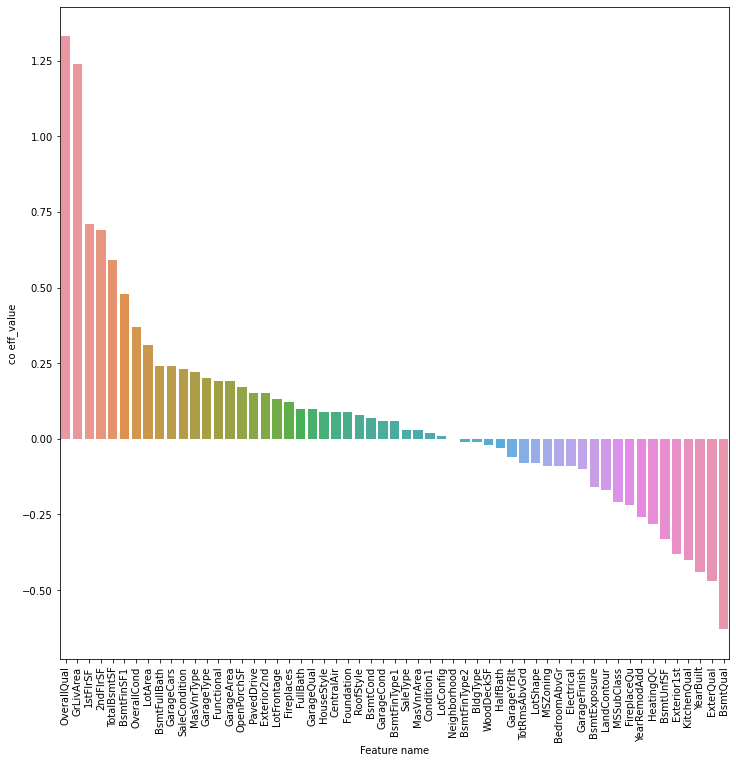

In [196]:
plt.figure(figsize=(12,12))
sns.barplot(x=elast_model_features_sorted.index,y=elast_model_features_sorted['co eff_value'])
plt.xticks(rotation=90)
plt.show()